# Evaluating the Scores

In [1]:
import pandas as pd
import os

df_questions_table = pd.read_csv('data/questions.csv')
df_prompted_table = pd.read_csv('data/prompted.csv',low_memory=False)
df_unprompted_table = pd.read_csv('data/unprompted.csv',low_memory=False)
df_no_assistance_table = pd.read_csv('data/noassistance.csv',low_memory=False)
df_feedback_ques = pd.read_csv('data/feedback.csv',low_memory=False)
df_feedback_ans = pd.read_csv('data/feedbackans.csv',low_memory=False)
user_data_df = pd.read_csv('data/users.csv')

Get correct the correct answers from questions table to evaluate the scores

In [2]:
option_mapping = {
    'op1': 'A',
    'op2': 'B',
    'op3': 'C',
    'op4': 'D',
}

correct_answers_mapped = []

for index, row in df_questions_table.iterrows():
    for option, letter in option_mapping.items():
        if row[option] == row['ans']:
            correct_answers_mapped.append(letter)
            break

print(correct_answers_mapped)

['A', 'C', 'D', 'D', 'D', 'D', 'C', 'B', 'C', 'C', 'C', 'B']


In [3]:
df_questions_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     12 non-null     int64 
 1   question               12 non-null     object
 2   op1                    12 non-null     object
 3   op2                    12 non-null     object
 4   op3                    12 non-null     object
 5   op4                    12 non-null     object
 6   ans                    12 non-null     object
 7   actual_suggestion      12 non-null     object
 8   misleading_suggestion  12 non-null     object
dtypes: int64(1), object(8)
memory usage: 996.0+ bytes


# Prompted table

In [4]:
# prompted table
df_prompted_table.head(n=41)
main_columns= ['id', 'user', 'action', 'page','time', 'date']
df_prompted_table_1 = df_prompted_table[main_columns]
df_prompted_table_1

,id,user,action,page,time,date
0,330,22BCS028,Start,0,14:17:35,2024-02-26T14:19:37.557842+05:30
1,331,22BCS003,Start,0,14:18:25,2024-02-26T14:19:38.875701+05:30
2,332,22BCS031,Start,0,14:18:43,2024-02-26T14:20:13.623251+05:30
3,333,22BCS005,Start,0,14:16:56,2024-02-26T14:20:19.137505+05:30
4,334,22BCS036,Start,0,14:17:36,2024-02-26T14:20:48.676152+05:30
...,...,...,...,...,...,...
16178,16508,AA.SC.U3BCA2401106,D,11,08:21:35,2024-05-09T08:21:36.282105+05:30
16179,16509,AA.SC.U3BCA2401106,Continue,11,08:21:35,2024-05-09T08:21:37.645179+05:30
16180,16510,AA.SC.U3BCA2401106,B,12,08:21:37,2024-05-09T08:22:14.839032+05:30
16181,16511,AA.SC.U3BCA2401106,End,12,08:22:14,2024-05-09T08:22:17.780265+05:30


In [5]:
prompted_grouped_df = df_prompted_table_1.groupby('user')
# grouped_df.head()
prompted_rearranged_df = prompted_grouped_df.apply(lambda x: x.sort_values(['date', 'time']))
prompted_final_df = prompted_rearranged_df.reset_index(level=1, drop=True)
print(prompted_final_df)

         id  user    action  page      time                              date
user                                                                         
01     9925    01     Start     0  14:31:50  2024-02-28T14:32:58.051637+05:30
01     9955    01         C     1  14:32:58  2024-02-28T14:33:39.252794+05:30
01     9970    01  Continue     1  14:33:39  2024-02-28T14:33:45.453092+05:30
01    10003    01         B     2  14:33:45  2024-02-28T14:34:45.042132+05:30
01    10010    01  Continue     2  14:34:44  2024-02-28T14:34:47.947827+05:30
...     ...   ...       ...   ...       ...                               ...
test  14645  test  Continue     1  15:43:34  2024-05-02T15:43:35.811220+05:30
test  14646  test    Prompt     2  15:43:36  2024-05-02T15:43:51.593424+05:30
test  14647  test         C     2  15:43:52  2024-05-02T15:45:30.777630+05:30
test  14648  test  Continue     2  15:45:31  2024-05-02T15:45:32.165945+05:30
test  14649  test    Prompt     3  15:45:33  2024-05-02T15:46:11

Get Time Delta and Time Difference of each user actions

In [6]:
import pandas as pd

prompted_final_df['date'] = pd.to_datetime(prompted_final_df['date'])

start_date = pd.Timestamp('2024-04-12').date()
end_date = pd.Timestamp.today().date()
prompted_filtered_df = prompted_final_df[(prompted_final_df['date'].dt.date >= start_date) & 
                                         (prompted_final_df['date'].dt.date <= end_date)]

prompted_filtered_df = prompted_filtered_df.reset_index(drop=True)

# Display the filtered DataFrame
prompted_filtered_df


,id,user,action,page,time,date
0,15671,123,Start,0,14:47:43,2024-05-08 00:19:37.088158+05:30
1,15672,123,A,1,14:49:37,2024-05-08 00:19:45.097927+05:30
2,15673,123,Continue,1,14:49:44,2024-05-08 00:19:47.297186+05:30
3,15674,123,D,2,14:49:47,2024-05-08 00:19:49.937423+05:30
4,15675,123,Continue,2,14:49:49,2024-05-08 00:19:50.457712+05:30
...,...,...,...,...,...,...
2328,14645,test,Continue,1,15:43:34,2024-05-02 15:43:35.811220+05:30
2329,14646,test,Prompt,2,15:43:36,2024-05-02 15:43:51.593424+05:30
2330,14647,test,C,2,15:43:52,2024-05-02 15:45:30.777630+05:30
2331,14648,test,Continue,2,15:45:31,2024-05-02 15:45:32.165945+05:30


In [7]:
prompted_sorted_df = prompted_filtered_df.sort_values(['user', 'date'])

# Group the DataFrame by 'user' and calculate the datetime difference
date_diff = prompted_sorted_df.groupby('user')['date'].diff()

# Fill the first NaN value with the initial datetime
date_diff = date_diff.fillna(pd.Timedelta(0))

# Assign the date difference to a new column in the original DataFrame
prompted_filtered_df['date_diff'] = date_diff
prompted_filtered_df

,id,user,action,page,time,date,date_diff
0,15671,123,Start,0,14:47:43,2024-05-08 00:19:37.088158+05:30,0 days 00:00:00
1,15672,123,A,1,14:49:37,2024-05-08 00:19:45.097927+05:30,0 days 00:00:08.009769
2,15673,123,Continue,1,14:49:44,2024-05-08 00:19:47.297186+05:30,0 days 00:00:02.199259
3,15674,123,D,2,14:49:47,2024-05-08 00:19:49.937423+05:30,0 days 00:00:02.640237
4,15675,123,Continue,2,14:49:49,2024-05-08 00:19:50.457712+05:30,0 days 00:00:00.520289
...,...,...,...,...,...,...,...
2328,14645,test,Continue,1,15:43:34,2024-05-02 15:43:35.811220+05:30,0 days 00:00:02.130532
2329,14646,test,Prompt,2,15:43:36,2024-05-02 15:43:51.593424+05:30,0 days 00:00:15.782204
2330,14647,test,C,2,15:43:52,2024-05-02 15:45:30.777630+05:30,0 days 00:01:39.184206
2331,14648,test,Continue,2,15:45:31,2024-05-02 15:45:32.165945+05:30,0 days 00:00:01.388315


In [101]:
# Convert date_diff to a timedelta
prompted_filtered_df['date_diff'] = pd.to_timedelta(prompted_filtered_df['date_diff'])

# Filter users who have covered all 12 pages
user_page_counts = prompted_filtered_df.groupby('user')['page'].nunique()
users_with_all_pages = user_page_counts[user_page_counts >= 12].index

# Filter the DataFrame to include only these users
filtered_df = prompted_filtered_df[prompted_filtered_df['user'].isin(users_with_all_pages)]

# Calculate the total time taken by each user from Start to End
total_time_per_user = {}

for user, group in filtered_df.groupby('user'):
    start_time = group[group['action'] == 'Start']['date_diff'].sum()
    end_time = group[group['action'] == 'End']['date_diff'].sum()
    total_time = end_time - start_time
    total_time_per_user[user] = total_time
    
time_in_minutes = {user: td.total_seconds() / 60 for user, td in total_time_per_user.items()}
# Print the results
print(time_in_minutes)

{'123': 0.008842666666666667, '175018': 0.021424766666666668, '201ADB077': 0.023693299999999997, '2023195': 0.009042, '211ADB008': 0.0052498833333333335, '62': 0.019503250000000003, '7376222AD118': 0.03091285, '7376222BT150': 0.009661399999999999, '7376222CB127': 0.00810315, '8008': 0.00537005, 'AA.SC.P2MCA210790': 0.051331833333333333, 'AA.SC.P2MCA2307716': 0.009100033333333334, 'AA.SC.P2MCA2307722': 0.38628385, 'AA.SC.P2MCA2401703@ahead.students.amrita.edu': 0.10324613333333334, 'AA.SC.P2MCA2401716': 0.017699233333333335, 'AA.SC.U3BCA2401005': 0.03216665, 'AA.SC.U3BCA2401050': 0.022337433333333333, 'AA.SC.U3BCA2401059@ahead.students.amrita.edu': 0.11536971666666668, 'AA.SC.U3BCA2401080': 0.0316605, 'AA.SC.U3BCA2401106': 0.035663266666666665, 'AA.SC.U3CSC2107159': 0.019177383333333336, 'AIE22148': 0.12702075, 'AM': 0.013135850000000001, 'AM.AI.U4AID23049': 0.030672716666666665, 'AM.BU.P2MBA23003': 0.21181409999999998, 'AM.BU.P2MBA23005': 0.04848655, 'AM.BU.P2MBA23013': 0.0296732, 'AM.

In [8]:
user_data = prompted_filtered_df.loc[prompted_filtered_df['user'] == 'AM.EN.P2RAU22001']
user_data

,id,user,action,page,time,date,date_diff
1014,15345,AM.EN.P2RAU22001,Start,0,06:17:48,2024-05-06 06:19:03.652651+05:30,0 days 00:00:00
1015,15346,AM.EN.P2RAU22001,B,1,06:19:03,2024-05-06 06:19:23.669317+05:30,0 days 00:00:20.016666
1016,15347,AM.EN.P2RAU22001,Continue,1,06:19:23,2024-05-06 06:19:25.193533+05:30,0 days 00:00:01.524216
1017,15348,AM.EN.P2RAU22001,C,2,06:19:25,2024-05-06 06:19:43.213171+05:30,0 days 00:00:18.019638
1018,15349,AM.EN.P2RAU22001,Continue,2,06:19:43,2024-05-06 06:19:44.083369+05:30,0 days 00:00:00.870198
1019,15350,AM.EN.P2RAU22001,D,3,06:19:43,2024-05-06 06:19:56.977426+05:30,0 days 00:00:12.894057
1020,15351,AM.EN.P2RAU22001,Continue,3,06:19:56,2024-05-06 06:19:57.727796+05:30,0 days 00:00:00.750370
1021,15352,AM.EN.P2RAU22001,D,4,06:19:57,2024-05-06 06:20:18.288402+05:30,0 days 00:00:20.560606
1022,15353,AM.EN.P2RAU22001,Continue,4,06:20:18,2024-05-06 06:20:19.697539+05:30,0 days 00:00:01.409137
1023,15354,AM.EN.P2RAU22001,D,5,06:20:19,2024-05-06 06:20:40.418415+05:30,0 days 00:00:20.720876


## Mapping the Actions of each user into a dictionary

In [9]:
# prompted_action_user_mapping = {}

# for index, row in prompted_filtered_df.iterrows():
#     user = row['user']
#     action = row['action']
    
#     # Check if the user is already in the dictionary
#     if user in prompted_action_user_mapping:
#         # If user is already in dictionary, append the current action to the existing list for that user
#         prompted_action_user_mapping[user].append(action)
#     else:
#         # If the user is not in the dictionary, create a new entry with the action as a list
#         prompted_action_user_mapping[user] = [action]


In [94]:
prompted_action_user_mapping = {}

for index, row in prompted_filtered_df.iterrows():
    user = row['user']
    action = row['action']
    page = row['page']  # Assuming there is a 'page' column

    # Initialize the user's mapping if not already present
    if user not in prompted_action_user_mapping:
        prompted_action_user_mapping[user] = {}
    
    # Initialize the start of new session if 'Start' is encountered
    if action == 'Start':
        prompted_action_user_mapping[user] = {}  # Reset all page mappings for this user
    
    # Add or overwrite the action for the current page
    if page not in prompted_action_user_mapping[user]:
        prompted_action_user_mapping[user][page] = [action]  # Start with the current action
    else:
        # If 'Continue' or 'End' is the last recorded action, don't add new actions to this page
        if 'Continue' in prompted_action_user_mapping[user][page] or 'End' in prompted_action_user_mapping[user][page]:
            continue
        # Otherwise, add the current action
        prompted_action_user_mapping[user][page].append(action)

# After the loop, convert each user's page mapping to a simple list to match your format
for user, pages in prompted_action_user_mapping.items():
    # Flatten the list of actions for all pages into a single list
    user_actions = []
    for page_number in sorted(pages):
        user_actions.extend(pages[page_number])
    prompted_action_user_mapping[user] = user_actions


## Filtering/ Removing the all other Actions and storing only the last selected options by the user

In [96]:
prompted_options_before_continue = {}

for user, actions in prompted_action_user_mapping.items():
    options = []
    last_option = None  # This will track the most recent valid option before 'Continue'
    start_encountered = False  # To detect if a new session has started

    for idx, action in enumerate(actions):
        if action == 'Start':
            start_encountered = True
            options = []  # Reset options list when 'Start' action is encountered
        elif action == 'Continue' or action == 'End':
            if last_option is not None:
                options.append(last_option)
                last_option = None  # Reset last_option after appending it
        elif action not in ['Start', 'Continue', 'End', 'Prompt']:
            last_option = action

        # Update the dictionary at the end of each complete iteration or at 'End'
        if action == 'End' and start_encountered:
            prompted_options_before_continue[user] = options
            start_encountered = False  # Reset start flag for safety, though it should naturally flow

# At the end of the loop, the dictionary will only contain the latest complete set of options per user


## Comparing results

In [97]:
prompted_comparison_results_by_user = {}

for user, actions in prompted_options_before_continue.items():
    user_comparison_results = []

    for action in actions:
        # add 1 if answer is correct, otherwise add 0 to the list
        if action in correct_answers_mapped:
            action_index = actions.index(action)
            correct_answer_at_index = correct_answers_mapped[action_index] if action_index < len(correct_answers_mapped) else None
            user_comparison_results.append(1 if action == correct_answer_at_index else 0)
        else:
            user_comparison_results.append(0)

    prompted_comparison_results_by_user[user] = user_comparison_results

prompted_comparison_results_by_user

{'123': [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 '175018': [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 '201ADB077': [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 '2023195': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '211ADB008': [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 '62': [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 '7376222AD118': [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 '7376222BT150': [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 '7376222CB127': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 '8008': [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
 'AA.SC.P2MCA210790': [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0],
 'AA.SC.P2MCA2307716': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'AA.SC.P2MCA2307722': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 'AA.SC.P2MCA2401703@ahead.students.amrita.edu': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0],
 'AA.SC.P2MCA2401716': [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 'AA.SC.U3BCA2401005': [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 'AA.SC.U3BCA2401050': [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
 'AA.SC.U3BCA2401059

## Sum of Scores of each user

In [13]:
prompted_sum_of_results_by_user = {}

for user, results in prompted_comparison_results_by_user.items():
    crt_score = sum(results[:7])  # Sum of first 7 items for CRT
    basic_math_score = sum(results[7:])  # Sum of remaining items for Basic Math
    total_score = sum(results)  # Sum of all items for Total
    prompted_sum_of_results_by_user[user] = {'CRT': crt_score, 'Basic Math': basic_math_score, 'Score': total_score}

prompted_sum_of_results_by_user

{'123': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '175018': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '201ADB077': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '2023195': {'CRT': 0, 'Basic Math': 0, 'Score': 0},
 '211ADB008': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '62': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '7376222AD118': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '7376222BT150': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '7376222CB127': {'CRT': 1, 'Basic Math': 1, 'Score': 2},
 '8008': {'CRT': 4, 'Basic Math': 5, 'Score': 9},
 'AA.SC.P2MCA210790': {'CRT': 5, 'Basic Math': 3, 'Score': 8},
 'AA.SC.P2MCA2307716': {'CRT': 1, 'Basic Math': 0, 'Score': 1},
 'AA.SC.P2MCA2307722': {'CRT': 0, 'Basic Math': 2, 'Score': 2},
 'AA.SC.P2MCA2401703@ahead.students.amrita.edu': {'CRT': 0,
  'Basic Math': 2,
  'Score': 2},
 'AA.SC.P2MCA2401716': {'CRT': 6, 'Basic Math': 3, 'Score': 9},
 'AA.SC.U3BCA2401005': {'CRT': 1, 'Basic Math': 1, 'Score': 2},
 'AA.SC.U3BCA2401050': {'CRT': 1, 'Basic Math': 3, 

In [14]:
len(prompted_sum_of_results_by_user)

76

Exporting the user_id and score to a CSV/Excel

In [15]:
import pandas as pd

df = pd.DataFrame.from_dict(prompted_sum_of_results_by_user, orient='index').reset_index()
df.rename(columns={'index': 'Roll Number'}, inplace=True)

# Export to Excel
df.to_excel('prompted_scores.xlsx', index=False)

# Export to CSV
df.to_csv('prompted_scores.csv', index=False)

# Unprompted Analysis

In [16]:
# unprompted table
df_unprompted_table.head(n=41)
main_columns= ['id', 'user', 'action', 'page','time', 'date']
df_unprompted_table_1 = df_unprompted_table[main_columns]
df_unprompted_table_1

,id,user,action,page,time,date
0,620,22BEC020,Start,0,13:59:58,2024-02-26T14:00:51.948819+05:30
1,621,22Bec040,Start,0,14:06:24,2024-02-26T14:07:33.214200+05:30
2,622,22Bec040,A,1,14:07:31,2024-02-26T14:07:44.559094+05:30
3,623,22Bec040,Continue,1,14:07:42,2024-02-26T14:07:47.219969+05:30
4,624,22BEC039,Start,0,14:06:56,2024-02-26T14:08:27.619232+05:30
...,...,...,...,...,...,...
16175,16795,Hari,Continue,10,23:45:14,2024-05-08T23:45:15.853902+05:30
16176,16796,Hari,D,11,23:45:15,2024-05-08T23:45:22.528492+05:30
16177,16797,Hari,Continue,11,23:45:22,2024-05-08T23:45:23.452908+05:30
16178,16798,Hari,C,12,23:45:23,2024-05-08T23:45:33.741944+05:30


In [17]:
unprompted_grouped_df = df_unprompted_table_1.groupby('user')
# grouped_df.head()
unprompted_rearranged_df = unprompted_grouped_df.apply(lambda x: x.sort_values(['date', 'time']))
unprompted_final_df = unprompted_rearranged_df.reset_index(level=1, drop=True)

In [18]:
unprompted_final_df['date'] = pd.to_datetime(unprompted_final_df['date'])

start_date = pd.Timestamp('2024-04-12').date()
end_date = pd.Timestamp.today().date()
unprompted_filtered_df = unprompted_final_df[(unprompted_final_df['date'].dt.date >= start_date) & 
                                         (unprompted_final_df['date'].dt.date <= end_date)]
# Optionally, you can reset the index
unprompted_filtered_df = unprompted_filtered_df.reset_index(drop=True)
unprompted_filtered_df

,id,user,action,page,time,date
0,16223,088,Start,0,18:38:26,2024-05-08 18:40:29.679569+05:30
1,16238,088,B,1,18:41:14,2024-05-08 18:40:50.299848+05:30
2,16241,088,Continue,1,18:41:35,2024-05-08 18:40:56.203674+05:30
3,16253,088,B,2,18:41:40,2024-05-08 18:41:19.025516+05:30
4,16256,088,Continue,2,18:42:03,2024-05-08 18:41:20.935788+05:30
...,...,...,...,...,...,...
2700,14673,vicky,Continue,10,12:01:38,2024-05-03 12:01:44.035122+05:30
2701,14674,vicky,C,11,12:01:44,2024-05-03 12:01:58.320139+05:30
2702,14675,vicky,Continue,11,12:01:58,2024-05-03 12:02:06.067928+05:30
2703,14676,vicky,B,12,12:02:06,2024-05-03 12:03:14.765741+05:30


In [19]:
unprompted_sorted_df = unprompted_filtered_df.sort_values(['user', 'date'])

# Group the DataFrame by 'user' and calculate the datetime difference
date_diff = unprompted_sorted_df.groupby('user')['date'].diff()

# Fill the first NaN value with the initial datetime
date_diff = date_diff.fillna(pd.Timedelta(0))

# Assign the date difference to a new column in the original DataFrame
unprompted_filtered_df['date_diff'] = date_diff
unprompted_filtered_df

,id,user,action,page,time,date,date_diff
0,16223,088,Start,0,18:38:26,2024-05-08 18:40:29.679569+05:30,0 days 00:00:00
1,16238,088,B,1,18:41:14,2024-05-08 18:40:50.299848+05:30,0 days 00:00:20.620279
2,16241,088,Continue,1,18:41:35,2024-05-08 18:40:56.203674+05:30,0 days 00:00:05.903826
3,16253,088,B,2,18:41:40,2024-05-08 18:41:19.025516+05:30,0 days 00:00:22.821842
4,16256,088,Continue,2,18:42:03,2024-05-08 18:41:20.935788+05:30,0 days 00:00:01.910272
...,...,...,...,...,...,...,...
2700,14673,vicky,Continue,10,12:01:38,2024-05-03 12:01:44.035122+05:30,0 days 00:00:05.480292
2701,14674,vicky,C,11,12:01:44,2024-05-03 12:01:58.320139+05:30,0 days 00:00:14.285017
2702,14675,vicky,Continue,11,12:01:58,2024-05-03 12:02:06.067928+05:30,0 days 00:00:07.747789
2703,14676,vicky,B,12,12:02:06,2024-05-03 12:03:14.765741+05:30,0 days 00:01:08.697813



## Mapping the Actions of each user into a dictionary

In [20]:
# unprompted_action_user_mapping = {}

# for index, row in unprompted_filtered_df.iterrows():
#     user = row['user']
#     action = row['action']
    
#     # Check if the user is already in the dictionary
#     if user in unprompted_action_user_mapping:
#         # If user is already in dictionary, append the current action to the existing list for that user
#         unprompted_action_user_mapping[user].append(action)
#     else:
#         # If the user is not in the dictionary, create a new entry with the action as a list
#         unprompted_action_user_mapping[user] = [action]

# # unprompted_action_user_mapping['AM.BU.P2MBA23045']

In [21]:
unprompted_action_user_mapping = {}

for index, row in unprompted_filtered_df.iterrows():
    user = row['user']
    action = row['action']
    page = row['page']  # Assuming there is a 'page' column

    # Initialize the user's mapping if not already present
    if user not in unprompted_action_user_mapping:
        unprompted_action_user_mapping[user] = {}
    
    # Initialize the start of new session if 'Start' is encountered
    if action == 'Start':
        unprompted_action_user_mapping[user] = {}  # Reset all page mappings for this user
    
    # Add or overwrite the action for the current page
    if page not in unprompted_action_user_mapping[user]:
        unprompted_action_user_mapping[user][page] = [action]  # Start with the current action
    else:
        # If 'Continue' or 'End' is the last recorded action, don't add new actions to this page
        if 'Continue' in unprompted_action_user_mapping[user][page] or 'End' in unprompted_action_user_mapping[user][page]:
            continue
        # Otherwise, add the current action
        unprompted_action_user_mapping[user][page].append(action)

# After the loop, convert each user's page mapping to a simple list to match your format
for user, pages in unprompted_action_user_mapping.items():
    # Flatten the list of actions for all pages into a single list
    user_actions = []
    for page_number in sorted(pages):
        user_actions.extend(pages[page_number])
    unprompted_action_user_mapping[user] = user_actions


## Filtering/ Removing the all other Actions and storing only the last selected options by the user

In [22]:
unprompted_options_before_continue = {}

for user, actions in unprompted_action_user_mapping.items():
    options = []
    last_option = None  # This will track the most recent valid option before 'Continue'
    start_encountered = False  # Flag to track if 'Start' action has been encountered
    
    for idx, action in enumerate(actions):
        if action == 'Start':
            start_encountered = True
            options = []  # Reset options list when 'Start' action is encountered
        elif action == 'Continue' or action == 'End':
            if last_option is not None:
                options.append(last_option)
                last_option = None  # Reset last_option after appending it
        elif action not in ['Start', 'Continue', 'End']:
            last_option = action
    
            unprompted_options_before_continue[user] = options


## Comparing Results

In [23]:
unprompted_comparison_results_by_user = {}

for user, actions in unprompted_options_before_continue.items():
    user_comparison_results = []

    for action in actions:
        # add 1 if answer is correct, otherwise add 0 to the list
        if action in correct_answers_mapped:
            action_index = actions.index(action)
            correct_answer_at_index = correct_answers_mapped[action_index] if action_index < len(correct_answers_mapped) else None
            user_comparison_results.append(1 if action == correct_answer_at_index else 0)
        else:
            user_comparison_results.append(0)

    unprompted_comparison_results_by_user[user] = user_comparison_results



# Sum of Scores of each user

In [24]:
# sum of compared results for each user
unprompted_sum_of_results_by_user = {}

for user, results in unprompted_comparison_results_by_user.items():
    crt_score = sum(results[:7])  # Sum of first 7 items for CRT
    basic_math_score = sum(results[7:])  # Sum of remaining items for Basic Math
    total_score = sum(results)  # Sum of all items for Total
    unprompted_sum_of_results_by_user[user] = {'CRT': crt_score, 'Basic Math': basic_math_score, 'Score': total_score}

unprompted_sum_of_results_by_user

{'088': {'CRT': 4, 'Basic Math': 3, 'Score': 7},
 '12345': {'CRT': 5, 'Basic Math': 3, 'Score': 8},
 '170012541': {'CRT': 0, 'Basic Math': 3, 'Score': 3},
 '184901': {'CRT': 4, 'Basic Math': 4, 'Score': 8},
 '195313': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '2018B40': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '2022097': {'CRT': 0, 'Basic Math': 0, 'Score': 0},
 '220984002': {'CRT': 3, 'Basic Math': 0, 'Score': 3},
 '221ADB150': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '221ADM090': {'CRT': 6, 'Basic Math': 4, 'Score': 10},
 '2237645': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '2267107': {'CRT': 7, 'Basic Math': 5, 'Score': 12},
 '23007': {'CRT': 0, 'Basic Math': 2, 'Score': 2},
 '25': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '38': {'CRT': 5, 'Basic Math': 3, 'Score': 8},
 '4672829': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '6382250654': {'CRT': 2, 'Basic Math': 3, 'Score': 5},
 '7376212BT801': {'CRT': 6, 'Basic Math': 3, 'Score': 9},
 '7376222BT164': {'CRT': 1, 'Basic Math': 4, 'Sc

In [25]:
len(unprompted_sum_of_results_by_user)

99

## Exporting the user_id and score to a CSV/Excel

In [26]:
import pandas as pd

df = pd.DataFrame.from_dict(unprompted_sum_of_results_by_user, orient='index').reset_index()
df.rename(columns={'index': 'Roll Number'}, inplace=True)

# excel
df.to_excel('unprompted_scores.xlsx', index=False)
#csv
df.to_csv('unprompted_scores.csv', index=False)

# No Assistance

In [27]:
# no assistance table
df_no_assistance_table.head(n=41)
main_columns= ['id', 'user', 'action', 'page','time', 'date']
df_no_assistance_table_1 = df_no_assistance_table[main_columns]
df_no_assistance_table_1

,id,user,action,page,time,date
0,413,71052202102,Start,0,14:07:25,2024-02-26T14:09:41.483483+05:30
1,414,71052202102,A,1,14:09:41,2024-02-26T14:10:07.336180+05:30
2,415,71052202102,Continue,1,14:10:06,2024-02-26T14:10:12.906158+05:30
3,416,22BCS084,Start,0,14:08:35,2024-02-26T14:10:20.308875+05:30
4,417,22BCS091,Start,0,14:08:47,2024-02-26T14:10:22.742413+05:30
...,...,...,...,...,...,...
13297,13710,kayal,Continue,10,23:39:17,2024-05-08T23:39:18.944459+05:30
13298,13711,kayal,D,11,23:39:18,2024-05-08T23:39:19.690540+05:30
13299,13712,kayal,Continue,11,23:39:19,2024-05-08T23:39:20.450105+05:30
13300,13713,kayal,A,12,23:39:20,2024-05-08T23:39:28.433072+05:30


In [28]:
no_assistance_grouped_df = df_no_assistance_table_1.groupby('user')
# grouped_df.head()
no_assistance_rearranged_df = no_assistance_grouped_df.apply(lambda x: x.sort_values(['date', 'time']))
no_assistance_final_df = no_assistance_rearranged_df.reset_index(level=1, drop=True)


In [29]:
no_assistance_final_df['date'] = pd.to_datetime(no_assistance_final_df['date'])

start_date = pd.Timestamp('2024-04-12').date()
end_date = pd.Timestamp.today().date()
no_assistance_filtered_df = no_assistance_final_df[(no_assistance_final_df['date'].dt.date >= start_date) & 
                                         (no_assistance_final_df['date'].dt.date <= end_date)]
# Optionally, you can reset the index
no_assistance_filtered_df = no_assistance_filtered_df.reset_index(drop=True)

In [30]:
no_assistance_sorted_df = no_assistance_filtered_df.sort_values(['user', 'date'])

# Group the DataFrame by 'user' and calculate the datetime difference
date_diff = no_assistance_sorted_df.groupby('user')['date'].diff()

# Fill the first NaN value with the initial datetime
date_diff = date_diff.fillna(pd.Timedelta(0))

# Assign the date difference to a new column in the original DataFrame
no_assistance_filtered_df['date_diff'] = date_diff
no_assistance_filtered_df

,id,user,action,page,time,date,date_diff
0,11761,005,Start,0,12:20:15,2024-05-03 12:20:32.946633+05:30,0 days 00:00:00
1,11762,005,Start,0,12:20:15,2024-05-03 12:20:57.307520+05:30,0 days 00:00:24.360887
2,11849,12220919,Start,0,17:52:04,2024-05-04 17:55:33.085097+05:30,0 days 00:00:00
3,11850,12220919,B,1,17:55:32,2024-05-04 17:55:45.728929+05:30,0 days 00:00:12.643832
4,11851,12220919,Continue,1,17:55:45,2024-05-04 17:55:49.793470+05:30,0 days 00:00:04.064541
...,...,...,...,...,...,...,...
2434,13048,senthl,D,12,13:21:08,2024-05-07 13:21:15.558377+05:30,0 days 00:00:02.454917
2435,13049,senthl,A,12,13:21:11,2024-05-07 13:21:22.023218+05:30,0 days 00:00:06.464841
2436,13050,senthl,C,12,13:21:17,2024-05-07 13:21:28.163496+05:30,0 days 00:00:06.140278
2437,13051,senthl,End,12,13:21:23,2024-05-07 13:21:37.518379+05:30,0 days 00:00:09.354883


## Mapping the Actions of each user into a dictionary

In [31]:
# no_assistance_action_user_mapping = {}

# for index, row in no_assistance_filtered_df.iterrows():
#     user = row['user']
#     action = row['action']
    
#     # Check if the user is already in the dictionary
#     if user in no_assistance_action_user_mapping:
#         # If user is already in dictionary, append the current action to the existing list for that user
#         no_assistance_action_user_mapping[user].append(action)
#     else:
#         # If the user is not in the dictionary, create a new entry with the action as a list
#         no_assistance_action_user_mapping[user] = [action]



In [32]:
no_assistance_action_user_mapping = {}

for index, row in no_assistance_filtered_df.iterrows():
    user = row['user']
    action = row['action']
    page = row['page']  # Assuming there is a 'page' column

    # Initialize the user's mapping if not already present
    if user not in no_assistance_action_user_mapping:
        no_assistance_action_user_mapping[user] = {}
    
    # Initialize the start of new session if 'Start' is encountered
    if action == 'Start':
        no_assistance_action_user_mapping[user] = {}  # Reset all page mappings for this user
    
    # Add or overwrite the action for the current page
    if page not in no_assistance_action_user_mapping[user]:
        no_assistance_action_user_mapping[user][page] = [action]  # Start with the current action
    else:
        # If 'Continue' or 'End' is the last recorded action, don't add new actions to this page
        if 'Continue' in no_assistance_action_user_mapping[user][page] or 'End' in no_assistance_action_user_mapping[user][page]:
            continue
        # Otherwise, add the current action
        no_assistance_action_user_mapping[user][page].append(action)

# After the loop, convert each user's page mapping to a simple list to match your format
for user, pages in no_assistance_action_user_mapping.items():
    # Flatten the list of actions for all pages into a single list
    user_actions = []
    for page_number in sorted(pages):
        user_actions.extend(pages[page_number])
    no_assistance_action_user_mapping[user] = user_actions


## Filtering/ Removing the all other Actions and storing only the last selected options by the user

In [33]:
no_assistance_options_before_continue = {}

for user, actions in no_assistance_action_user_mapping.items():
    options = []
    last_option = None  # This will track the most recent valid option before 'Continue'

    for idx, action in enumerate(actions):
        if action == 'Start':
            start_encountered = True
            options = []  # Reset options list when 'Start' action is encountered
        elif action == 'Continue' or action == 'End':
            if last_option is not None:
                options.append(last_option)
                last_option = None  # Reset last_option after appending it
        elif action not in ['Start', 'Continue', 'End']:
            last_option = action
    
    no_assistance_options_before_continue[user] = options



In [34]:
no_assistance_comparison_results_by_user = {}

for user, actions in no_assistance_options_before_continue.items():
    user_comparison_results = []

    for action in actions:
        # add 1 if answer is correct, otherwise add 0 to the list
        if action in correct_answers_mapped:
            action_index = actions.index(action)
            correct_answer_at_index = correct_answers_mapped[action_index] if action_index < len(correct_answers_mapped) else None
            user_comparison_results.append(1 if action == correct_answer_at_index else 0)
        else:
            user_comparison_results.append(0)

    no_assistance_comparison_results_by_user[user] = user_comparison_results



## Sum of Scores of each user

In [35]:

# sum of compared results for each user
no_assistance_sum_of_results_by_user = {}

for user, results in no_assistance_comparison_results_by_user.items():
    crt_score = sum(results[:7])  # Sum of first 7 items for CRT
    basic_math_score = sum(results[7:])  # Sum of remaining items for Basic Math
    total_score = sum(results)  # Sum of all items for Total
    no_assistance_sum_of_results_by_user[user] = {'CRT': crt_score, 'Basic Math': basic_math_score, 'Score': total_score}

no_assistance_sum_of_results_by_user

{'005': {'CRT': 0, 'Basic Math': 0, 'Score': 0},
 '12220919': {'CRT': 3, 'Basic Math': 3, 'Score': 6},
 '1503043': {'CRT': 3, 'Basic Math': 2, 'Score': 5},
 '174042': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '19bac116': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '2023024': {'CRT': 2, 'Basic Math': 3, 'Score': 5},
 '220133': {'CRT': 5, 'Basic Math': 3, 'Score': 8},
 '221ADM100': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '221AMM027': {'CRT': 1, 'Basic Math': 3, 'Score': 4},
 '221AMM029': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '22MCI0004': {'CRT': 0, 'Basic Math': 0, 'Score': 0},
 '22mba015': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '5': {'CRT': 0, 'Basic Math': 0, 'Score': 0},
 '703363795': {'CRT': 0, 'Basic Math': 0, 'Score': 0},
 '71812202254': {'CRT': 0, 'Basic Math': 0, 'Score': 0},
 '7376212BT174': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '7376221CS314': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '7376222AD194': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '7376222BT134': {'CRT': 1

In [36]:
len(no_assistance_sum_of_results_by_user)

100

Exporting the user_id and score to a CSV/Excel

In [37]:
import pandas as pd

df = pd.DataFrame.from_dict(no_assistance_sum_of_results_by_user, orient='index').reset_index()
df.rename(columns={'index': 'Roll Number'}, inplace=True)

# excel
df.to_excel('no_assistance_scores.xlsx', index=False)
#csv
df.to_csv('no_assistance_scores.csv', index=False)

## Plots

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prompted_score_df = pd.read_csv('prompted_scores.csv')
unprompted_score_df = pd.read_csv('unprompted_scores.csv')
no_assistance_score_df = pd.read_csv('no_assistance_scores.csv')

## CRT Score

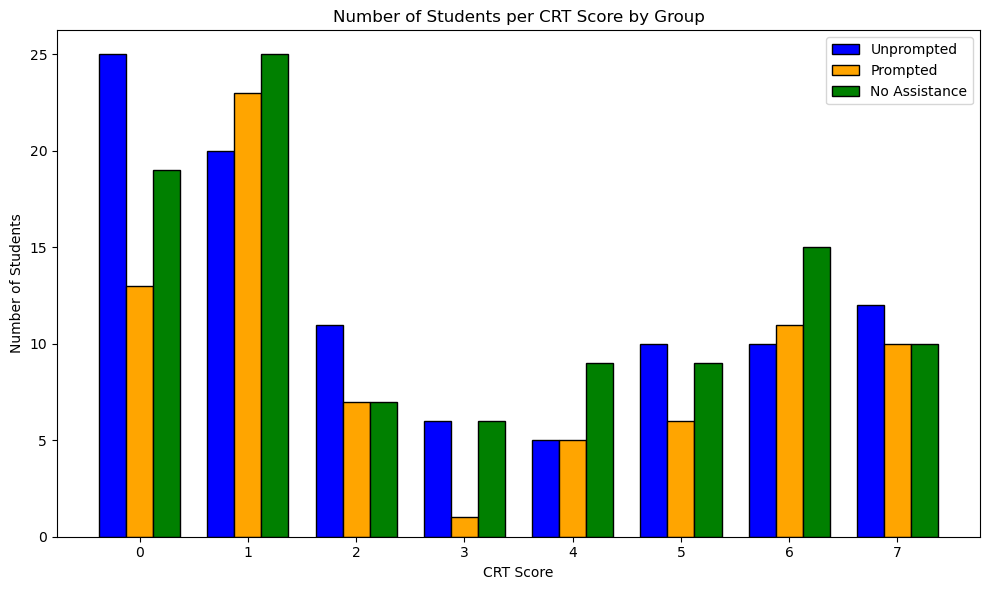

In [39]:
unprompted_counts = unprompted_score_df['CRT'].value_counts().sort_index()
prompted_counts = prompted_score_df['CRT'].value_counts().sort_index()
no_assistance_counts = no_assistance_score_df['CRT'].value_counts().sort_index()

# Get the maximum CRT score for setting x-axis limits
max_crt_score = max(unprompted_score_df['CRT'].max(), prompted_score_df['CRT'].max(), no_assistance_score_df['CRT'].max())

# Get a sorted array of all unique CRT scores present in the data from all groups
unique_scores = sorted(set(unprompted_score_df['CRT']) | set(prompted_score_df['CRT']) | set(no_assistance_score_df['CRT']))

# Map the counts to the unique_scores, filling missing values with 0
unprompted_mapped_counts = unprompted_counts.reindex(unique_scores, fill_value=0)
prompted_mapped_counts = prompted_counts.reindex(unique_scores, fill_value=0)
no_assistance_mapped_counts = no_assistance_counts.reindex(unique_scores, fill_value=0)

# Define the positions of the bars
positions = np.arange(len(unique_scores))

# Create a new figure for plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Plot vertical bars for each group
plt.bar(positions - bar_width, unprompted_mapped_counts, width=bar_width, color='blue', label='Unprompted', edgecolor='black')
plt.bar(positions, prompted_mapped_counts, width=bar_width, color='orange', label='Prompted', edgecolor='black')
plt.bar(positions + bar_width, no_assistance_mapped_counts, width=bar_width, color='green', label='No Assistance', edgecolor='black')

# Set the x-axis ticks to the positions of the scores and label them with the actual scores
plt.xticks(positions, unique_scores)

# Add labels and title
plt.xlabel('CRT Score')
plt.ylabel('Number of Students')
plt.title('Number of Students per CRT Score by Group')

# Add legend
plt.legend()

# Save the plot
output_folder = 'output_folder'
os.makedirs(output_folder, exist_ok=True)
plot_filename = 'crt_score_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Badic Math Score

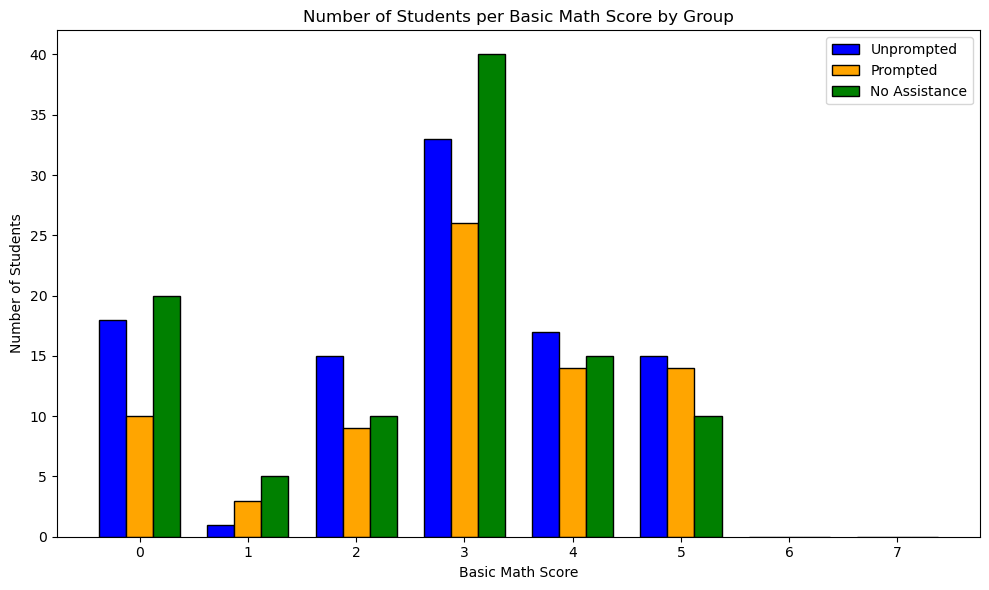

In [40]:
unprompted_counts = unprompted_score_df['Basic Math'].value_counts().sort_index()
prompted_counts = prompted_score_df['Basic Math'].value_counts().sort_index()
no_assistance_counts = no_assistance_score_df['Basic Math'].value_counts().sort_index()

# Get the maximum CRT score for setting x-axis limits
max_crt_score = max(unprompted_score_df['Basic Math'].max(), prompted_score_df['CRT'].max(), no_assistance_score_df['CRT'].max())

# Get a sorted array of all unique CRT scores present in the data from all groups
unique_scores = sorted(set(unprompted_score_df['Basic Math']) | set(prompted_score_df['CRT']) | set(no_assistance_score_df['CRT']))

# Map the counts to the unique_scores, filling missing values with 0
unprompted_mapped_counts = unprompted_counts.reindex(unique_scores, fill_value=0)
prompted_mapped_counts = prompted_counts.reindex(unique_scores, fill_value=0)
no_assistance_mapped_counts = no_assistance_counts.reindex(unique_scores, fill_value=0)

# Define the positions of the bars
positions = np.arange(len(unique_scores))

# Create a new figure for plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Plot vertical bars for each group
plt.bar(positions - bar_width, unprompted_mapped_counts, width=bar_width, color='blue', label='Unprompted', edgecolor='black')
plt.bar(positions, prompted_mapped_counts, width=bar_width, color='orange', label='Prompted', edgecolor='black')
plt.bar(positions + bar_width, no_assistance_mapped_counts, width=bar_width, color='green', label='No Assistance', edgecolor='black')

# Set the x-axis ticks to the positions of the scores and label them with the actual scores
plt.xticks(positions, unique_scores)

# Add labels and title
plt.xlabel('Basic Math Score')
plt.ylabel('Number of Students')
plt.title('Number of Students per Basic Math Score by Group')

# Add legend
plt.legend()

plot_filename = 'basic_math_score_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Total Score

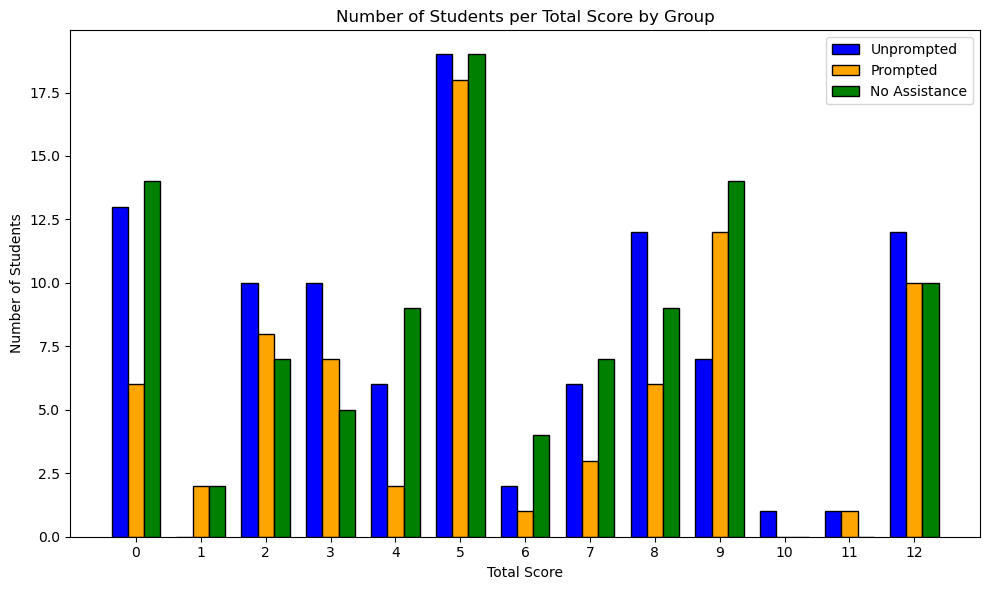

In [41]:
unprompted_counts = unprompted_score_df['Score'].value_counts().sort_index()
prompted_counts = prompted_score_df['Score'].value_counts().sort_index()
no_assistance_counts = no_assistance_score_df['Score'].value_counts().sort_index()

# Get the maximum CRT score for setting x-axis limits
max_crt_score = max(unprompted_score_df['Score'].max(), prompted_score_df['Score'].max(), no_assistance_score_df['CRT'].max())

# Get a sorted array of all unique CRT scores present in the data from all groups
unique_scores = sorted(set(unprompted_score_df['Score']) | set(prompted_score_df['Score']) | set(no_assistance_score_df['CRT']))

# Map the counts to the unique_scores, filling missing values with 0
unprompted_mapped_counts = unprompted_counts.reindex(unique_scores, fill_value=0)
prompted_mapped_counts = prompted_counts.reindex(unique_scores, fill_value=0)
no_assistance_mapped_counts = no_assistance_counts.reindex(unique_scores, fill_value=0)

# Define the positions of the bars
positions = np.arange(len(unique_scores))

# Create a new figure for plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Plot vertical bars for each group
plt.bar(positions - bar_width, unprompted_mapped_counts, width=bar_width, color='blue', label='Unprompted', edgecolor='black')
plt.bar(positions, prompted_mapped_counts, width=bar_width, color='orange', label='Prompted', edgecolor='black')
plt.bar(positions + bar_width, no_assistance_mapped_counts, width=bar_width, color='green', label='No Assistance', edgecolor='black')

# Set the x-axis ticks to the positions of the scores and label them with the actual scores
plt.xticks(positions, unique_scores)

# Add labels and title
plt.xlabel('Total Score')
plt.ylabel('Number of Students')
plt.title('Number of Students per Total Score by Group')

# Add legend
plt.legend()

plot_filename = 'total_score_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## ANOVA

## CRT Score

In [42]:
from scipy.stats import f_oneway

# Extracting the CRT scores for each group
unprompted_crt_scores = unprompted_score_df['CRT']
prompted_crt_scores = prompted_score_df['CRT']
no_assistance_crt_scores = no_assistance_score_df['CRT']

# Performing a one-way ANOVA
f_statistic, p_value = f_oneway(unprompted_crt_scores, prompted_crt_scores, no_assistance_crt_scores)

f_statistic, p_value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 0.2153
P-value: 0.8065


## Basic Math

In [43]:
from scipy.stats import f_oneway

# Extracting the CRT scores for each group
unprompted_crt_scores = unprompted_score_df['Basic Math']
prompted_crt_scores = prompted_score_df['Basic Math']
no_assistance_crt_scores = no_assistance_score_df['Basic Math']

# Performing a one-way ANOVA
f_statistic, p_value = f_oneway(unprompted_crt_scores, prompted_crt_scores, no_assistance_crt_scores)

f_statistic, p_value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 1.4719
P-value: 0.2313


## Total Score

In [44]:
from scipy.stats import f_oneway

# Extracting the CRT scores for each group
unprompted_crt_scores = unprompted_score_df['Score']
prompted_crt_scores = prompted_score_df['Score']
no_assistance_crt_scores = no_assistance_score_df['Score']

# Performing a one-way ANOVA
f_statistic, p_value = f_oneway(unprompted_crt_scores, prompted_crt_scores, no_assistance_crt_scores)

f_statistic, p_value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 0.3431
P-value: 0.7099


## Comparison between CGPA and Current Score of Users

In [45]:
user_data_df.head(n=41)
main_columns= ['roll_no', 'cgpa']
user_data_df_table_1_copy = user_data_df[main_columns]
user_data_df_table_1_copy

,roll_no,cgpa
0,22BEC020,8.38
1,22Bec040,8.00
2,22BEC039,7.50
3,22BEC046,7.50
4,22BEC035,6.50
...,...,...
797,12345,8.00
798,kayal,NaN
799,Hari,NaN
800,AA.SC.U3BCA2401106,NaN


In [46]:
user_data_df_table_1 = user_data_df_table_1_copy.copy()
user_data_df_table_1.rename(columns={'roll_no': 'Roll Number'}, inplace=True)

Correlation between CGPA and Quiz Score for Prompted Group:
            cgpa     Score
cgpa   1.000000  0.290674
Score  0.290674  1.000000
Correlation between CGPA and Quiz Score for Unprompted Group:
            cgpa     Score
cgpa   1.000000  0.000317
Score  0.000317  1.000000
Correlation between CGPA and Quiz Score for No Assistance Group:
            cgpa     Score
cgpa   1.000000  0.186712
Score  0.186712  1.000000


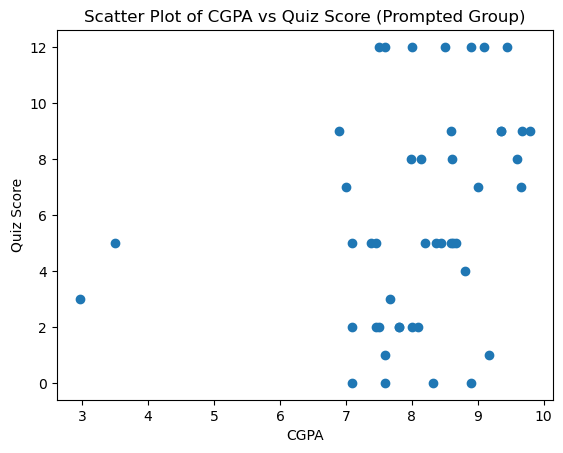

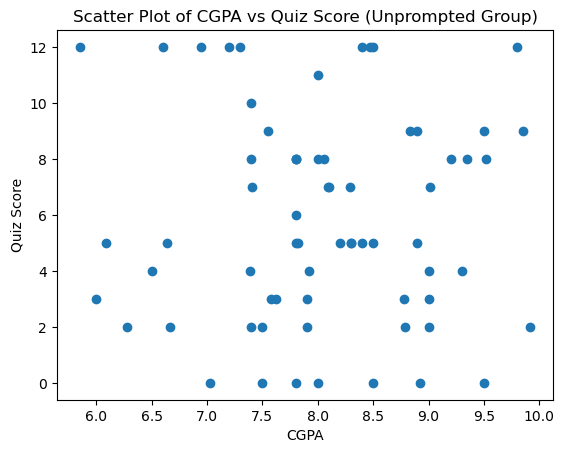

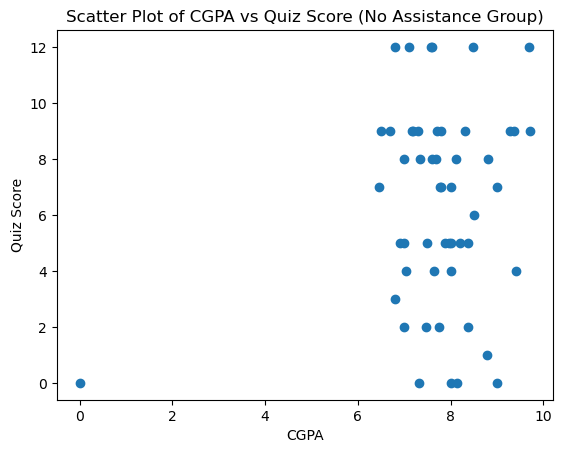

In [47]:
user_data_df_table_1.rename(columns={'roll_no': 'Roll Number'}, inplace=True)

prompted_df = prompted_score_df.merge(user_data_df_table_1, on='Roll Number')
unprompted_df = unprompted_score_df.merge(user_data_df_table_1, on='Roll Number')
no_assistance_df = no_assistance_score_df.merge(user_data_df_table_1, on='Roll Number')

# Now you can analyze the relationship between CGPA and quiz scores.
# For example, you can calculate the correlation coefficient for each group.
prompted_correlation = prompted_df[['cgpa', 'Score']].corr()
unprompted_correlation = unprompted_df[['cgpa', 'Score']].corr()
no_assistance_correlation = no_assistance_df[['cgpa', 'Score']].corr()

# You can print the correlation coefficients to get a quick sense of the relationships
print("Correlation between CGPA and Quiz Score for Prompted Group:\n", prompted_correlation)
print("Correlation between CGPA and Quiz Score for Unprompted Group:\n", unprompted_correlation)
print("Correlation between CGPA and Quiz Score for No Assistance Group:\n", no_assistance_correlation)

# To visualize the relationships, you could create scatter plots:
import matplotlib.pyplot as plt

def plot_relationship(df, group_name):
    plt.scatter(df['cgpa'], df['Score'])
    plt.title(f'Scatter Plot of CGPA vs Quiz Score ({group_name} Group)')
    plt.xlabel('CGPA')
    plt.ylabel('Quiz Score')
    plt.show()

plot_relationship(prompted_df, 'Prompted')
plot_relationship(unprompted_df, 'Unprompted')
plot_relationship(no_assistance_df, 'No Assistance')


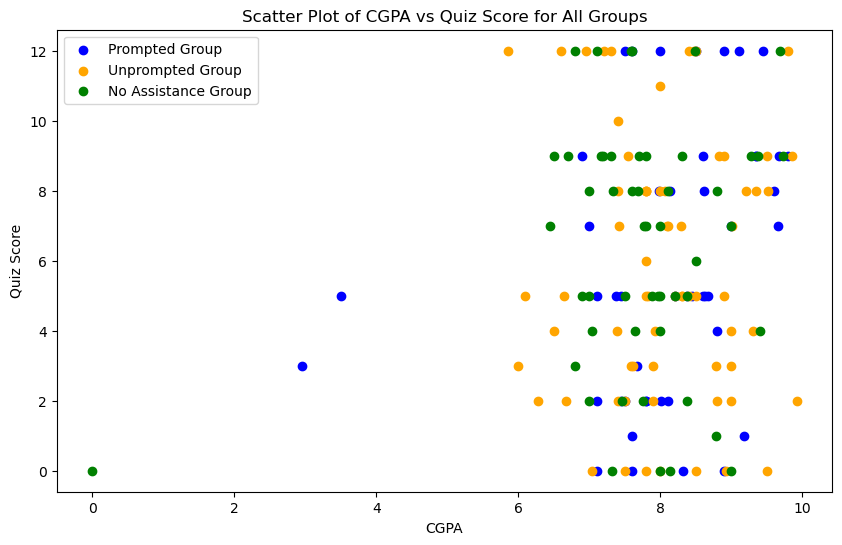

In [48]:
import matplotlib.pyplot as plt

# Create a single scatter plot with different colors for each group
plt.figure(figsize=(10, 6))

plt.scatter(prompted_df['cgpa'], prompted_df['Score'], color='blue', label='Prompted Group')
plt.scatter(unprompted_df['cgpa'], unprompted_df['Score'], color='orange', label='Unprompted Group')
plt.scatter(no_assistance_df['cgpa'], no_assistance_df['Score'], color='green', label='No Assistance Group')

# Labeling the axes and the plot
plt.xlabel('CGPA')
plt.ylabel('Quiz Score')
plt.title('Scatter Plot of CGPA vs Quiz Score for All Groups')

# Add a legend to explain which color corresponds to which group
plt.legend()

plot_filename = 'total_vs_cgpa_scatter_plot.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.show()

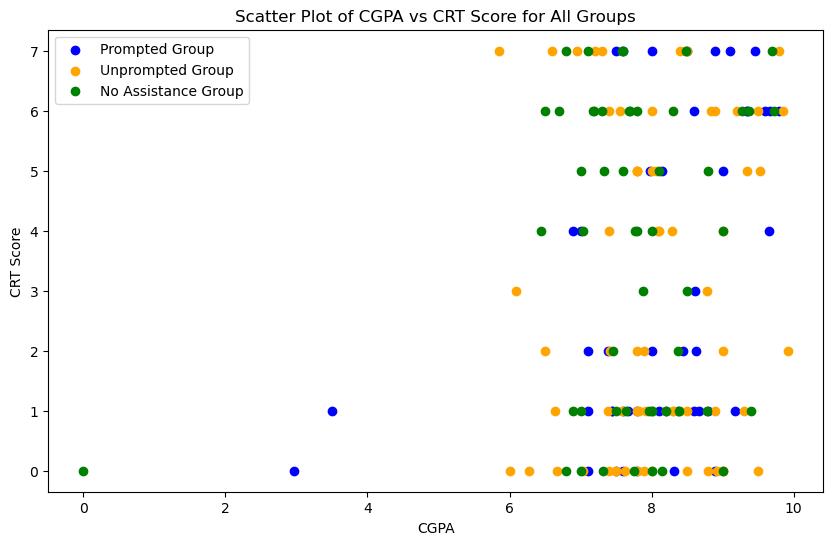

In [49]:
import matplotlib.pyplot as plt

# Create a single scatter plot with different colors for each group
plt.figure(figsize=(10, 6))

plt.scatter(prompted_df['cgpa'], prompted_df['CRT'], color='blue', label='Prompted Group')
plt.scatter(unprompted_df['cgpa'], unprompted_df['CRT'], color='orange', label='Unprompted Group')
plt.scatter(no_assistance_df['cgpa'], no_assistance_df['CRT'], color='green', label='No Assistance Group')

# Labeling the axes and the plot
plt.xlabel('CGPA')
plt.ylabel('CRT Score')
plt.title('Scatter Plot of CGPA vs CRT Score for All Groups')

# Add a legend to explain which color corresponds to which group
plt.legend()

plot_filename = 'crt_vs_cgpa_scatter_plot.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.show()

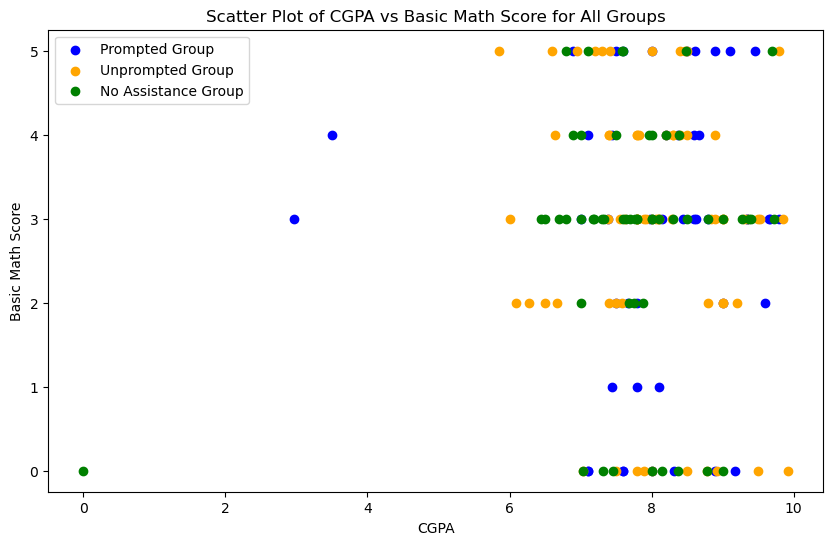

In [50]:
import matplotlib.pyplot as plt

# Create a single scatter plot with different colors for each group
plt.figure(figsize=(10, 6))

plt.scatter(prompted_df['cgpa'], prompted_df['Basic Math'], color='blue', label='Prompted Group')
plt.scatter(unprompted_df['cgpa'], unprompted_df['Basic Math'], color='orange', label='Unprompted Group')
plt.scatter(no_assistance_df['cgpa'], no_assistance_df['Basic Math'], color='green', label='No Assistance Group')

# Labeling the axes and the plot
plt.xlabel('CGPA')
plt.ylabel('Basic Math Score')
plt.title('Scatter Plot of CGPA vs Basic Math Score for All Groups')

# Add a legend to explain which color corresponds to which group
plt.legend()

plot_filename = 'bm_vs_cgpa_scatter_plot.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.show()

In [51]:
user_data_df_table_1_copy = user_data_df_table_1.copy()
user_data_df_table_1_copy.rename(columns={'roll_no': 'Roll Number'}, inplace=True)


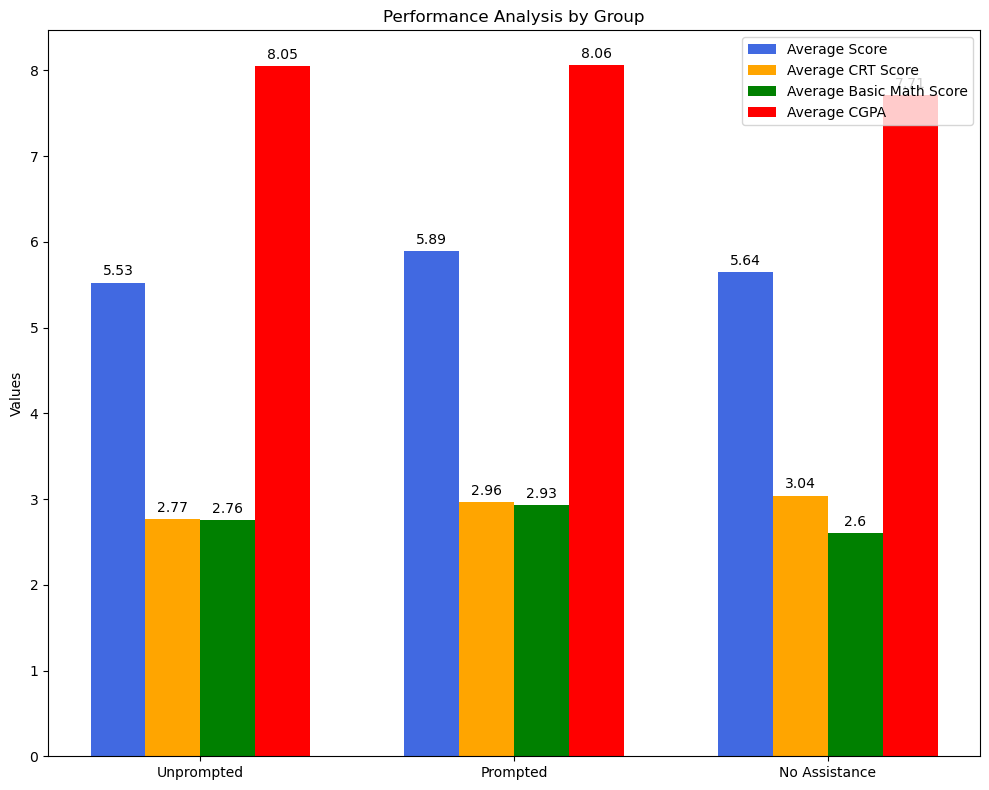

In [52]:
prompted_df = prompted_score_df.merge(user_data_df_table_1, on='Roll Number')
unprompted_df = unprompted_score_df.merge(user_data_df_table_1, on='Roll Number')
no_assistance_df = no_assistance_score_df.merge(user_data_df_table_1, on='Roll Number')

group_data = {
    'Groups': ['Unprompted', 'Prompted', 'No Assistance'],
    'Average Score': [
        unprompted_df['Score'].mean(),
        prompted_df['Score'].mean(),
        no_assistance_df['Score'].mean()
    ],
    'Average CGPA': [
        unprompted_df['cgpa'].mean(),
        prompted_df['cgpa'].mean(),
        no_assistance_df['cgpa'].mean()
    ],
    'Average CRT Score': [
        unprompted_df['CRT'].mean(),
        prompted_df['CRT'].mean(),
        no_assistance_df['CRT'].mean()
    ],
    'Average Baisc Math score': [
        unprompted_df['Basic Math'].mean(),
        prompted_df['Basic Math'].mean(),
        no_assistance_df['Basic Math'].mean()
    ]
    
}

group_df = pd.DataFrame(group_data)

# Setting up the x-axis for the bar graph
x = np.arange(len(group_df))

# Defining the width of the bars
width = 0.35

fig, ax = plt.subplots(figsize=(10, 8))

# Calculating the positions of the group bar clusters
bar_positions = np.arange(len(group_df['Groups']))

# Setting up individual bar positions within each cluster
bar_positions1 = bar_positions - width/2 - width/4
bar_positions2 = bar_positions - width/4
bar_positions3 = bar_positions + width/4
bar_positions4 = bar_positions + width/2 + width/4

# Plotting each set of bars
rects1 = ax.bar(bar_positions1, group_df['Average Score'], width/2, label='Average Score', color='royalblue')
rects2 = ax.bar(bar_positions2, group_df['Average CRT Score'], width/2, label='Average CRT Score', color='orange')
rects3 = ax.bar(bar_positions3, group_df['Average Baisc Math score'], width/2, label='Average Basic Math Score', color='green')
rects4 = ax.bar(bar_positions4, group_df['Average CGPA'], width/2, label='Average CGPA', color='red')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Performance Analysis by Group')
ax.set_xticks(bar_positions)
ax.set_xticklabels(group_df['Groups'])
ax.legend()

# Autolabel function to attach a text label above each bar, displaying its height
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Calling the autolabel function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plot_filename = 'performance_analysis_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Displaying the bar graph
plt.tight_layout()
plt.show()


## FEEDBACK

In [53]:
df_feedback_ques

,id,questions,option1,option2,option3,option4,option5
0,27,Win a gift card worth $300 or receive a $50 gi...,Choose the $300 gift card,Choose the monthly $50 gift cards for the next...,NaN,NaN,NaN
1,28,Choose a $400 end-of-year bonus now or a $100 ...,Choose $400 end-of-year bonus now,Choose a $100 increase in your monthly salary ...,NaN,NaN,NaN
2,29,"Pay a fine of Rs.2000 now, or take a 10% chanc...",Choose to pay Rs.2000 fine now,Choose to take 10% chance to pay Rs.3000 fine,NaN,NaN,NaN
3,30,"Pay a fine of Rs20 now, or take a 10% chance t...",Choose to pay Rs.20 fine now,Choose to take 10% chance to pay Rs.2000 fine,NaN,NaN,NaN
4,31,I am very impulsive,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
5,32,I like to take risks,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
6,33,I rely on logic in making decisions,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
7,34,I rely on emotion in making decisions,Strongly agree,Agree,Neutral,Disagree,Strongly disagree
8,35,How confident are you in the ability of an AI ...,Not at all confident,Slightly confident,Moderately confident,Very confident,Completely confident
9,36,To what extent do you believe that using an AI...,Not at all,Slightly,Moderately,Very,To a great extent


In [54]:
df_feedback_ans['date'] = pd.to_datetime(df_feedback_ans['date'])

start_date = pd.Timestamp('2024-04-12').date()
end_date = pd.Timestamp.today().date()
df_feedback_ans = df_feedback_ans[(df_feedback_ans['date'].dt.date >= start_date) & 
                                         (df_feedback_ans['date'].dt.date <= end_date)]
df_feedback_ans

,id,user,action,set,time,date,page
6676,6677,AM.SC.U4CYS23009,A,2,13:38:00,2024-04-12 13:38:07.480745+05:30,Question 1
6677,6678,AM.SC.U4CYS23009,B,2,13:38:00,2024-04-12 13:38:07.544025+05:30,Question 2
6678,6679,AM.SC.U4CYS23009,A,2,13:38:00,2024-04-12 13:38:07.605295+05:30,Question 3
6679,6680,AM.SC.U4CYS23009,A,2,13:38:00,2024-04-12 13:38:07.667899+05:30,Question 4
6680,6681,AM.SC.U4CYS23009,C,2,13:38:00,2024-04-12 13:38:07.738640+05:30,Question 5
...,...,...,...,...,...,...,...
12274,12275,AA.SC.U3BCA2401106,C,2,08:26:23,2024-05-09 08:27:48.785060+05:30,Question 14
12275,12276,AA.SC.U3BCA2401106,E,2,08:26:23,2024-05-09 08:27:51.275348+05:30,Question 15
12276,12277,AA.SC.U3BCA2401106,E,2,08:26:23,2024-05-09 08:27:52.416172+05:30,Question 16
12277,12278,AA.SC.U3BCA2401106,E,2,08:26:23,2024-05-09 08:27:53.666156+05:30,Question 17


In [55]:
first_4_questions = df_feedback_ques.head(4)
first_4_questions

,id,questions,option1,option2,option3,option4,option5
0,27,Win a gift card worth $300 or receive a $50 gi...,Choose the $300 gift card,Choose the monthly $50 gift cards for the next...,NaN,NaN,NaN
1,28,Choose a $400 end-of-year bonus now or a $100 ...,Choose $400 end-of-year bonus now,Choose a $100 increase in your monthly salary ...,NaN,NaN,NaN
2,29,"Pay a fine of Rs.2000 now, or take a 10% chanc...",Choose to pay Rs.2000 fine now,Choose to take 10% chance to pay Rs.3000 fine,NaN,NaN,NaN
3,30,"Pay a fine of Rs20 now, or take a 10% chance t...",Choose to pay Rs.20 fine now,Choose to take 10% chance to pay Rs.2000 fine,NaN,NaN,NaN


In [56]:
# merged_df = pd.merge(df_feedback_ques, df_feedback_ans, how='left')

# Create a dictionary to store user actions
user_actions = {}

# Iterate over the merged dataframe
for _, row in df_feedback_ans.iterrows():
    user_id = row['user']
    action = row['action']
    question = row['page']

    # Check if the user is already in the dictionary
    if user_id in user_actions:
        # If the user exists, append the action to the list
        user_actions[user_id].append((question, action))
    else:
        # If the user doesn't exist, create a new entry with a list containing the action
        user_actions[user_id] = [(question, action)]


In [57]:
cleaned_data = {}
for user, responses in user_actions.items():
    latest_responses = {}
    # Reverse the list so we process the latest occurrence first
    for question, response in reversed(responses):
        if question not in latest_responses:
            latest_responses[question] = response
    cleaned_data[user] = latest_responses



In [58]:
first_4_questions_user_response_data = {}

for user, responses in cleaned_data.items():
    filtered_responses = {q: r for q, r in responses.items() if q in ["Question 1", "Question 2", "Question 3", "Question 4"]}
    first_4_questions_user_response_data[user] = filtered_responses


In [59]:
questions_user_response_data_5_to_8 = {}

for user, responses in cleaned_data.items():
    filtered_responses = {q: r for q, r in responses.items() if q in ["Question 5", "Question 6", "Question 7", "Question 8"]}
    questions_user_response_data_5_to_8[user] = filtered_responses


In [60]:
questions_1_to_4 = {}
questions_5_to_8 = {}
remaining_9_to_18 = {}

for user, actions in user_actions.items():
    questions_1_to_4[user] = actions[:4]
    questions_5_to_8[user] = actions[4:8]
    remaining_9_to_18[user] = actions[8:]


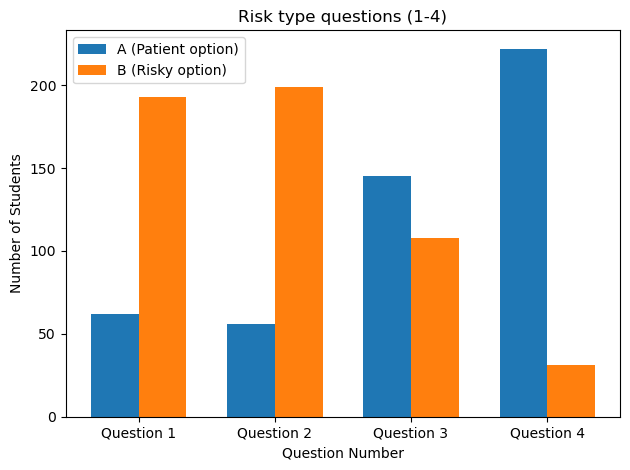

In [61]:
option1_counts = {f'Question {i}': 0 for i in range(1, 5)}
option2_counts = {f'Question {i}': 0 for i in range(1, 5)}

# Count the number of students who chose option1 or option2 for each question
for actions in questions_1_to_4.values():
    for question, option in actions:
        if option == 'A':
            option1_counts[question] += 1
        elif option == 'B':
            option2_counts[question] += 1

# Create a bar chart
fig, ax = plt.subplots()
question_numbers = list(range(1, 5))
bar_width = 0.35

option1_bars = ax.bar(question_numbers, option1_counts.values(), bar_width, label='A (Patient option)')
option2_bars = ax.bar([x + bar_width for x in question_numbers], option2_counts.values(), bar_width, label='B (Risky option)')

# Add labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Number of Students')
ax.set_title('Risk type questions (1-4)')
ax.set_xticks([x + bar_width / 2 for x in question_numbers])
ax.set_xticklabels([f'Question {num}' for num in question_numbers])

# Add legend
ax.legend()

plot_filename = 'questions_1_to_4.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

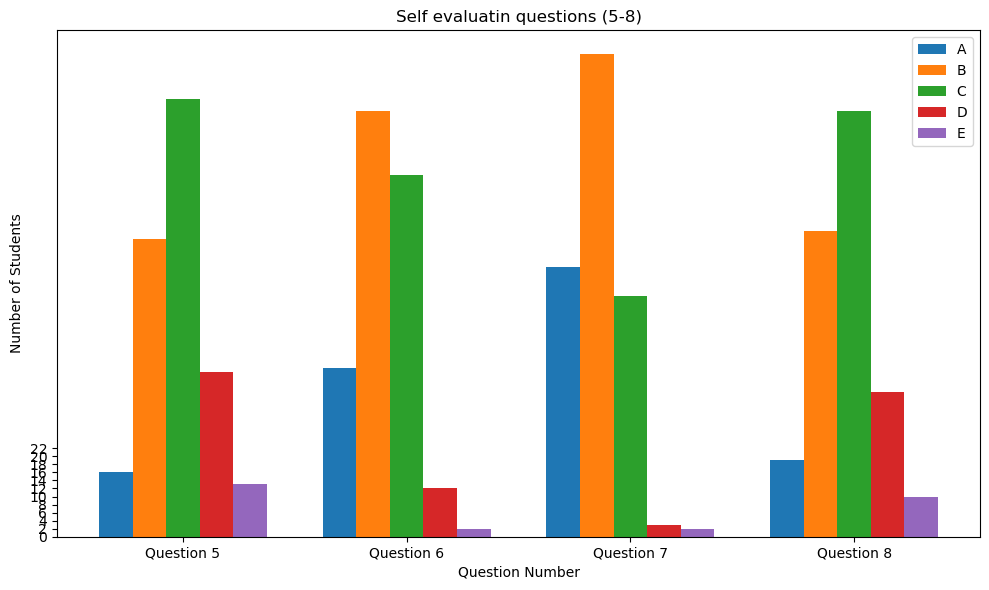

In [62]:
option1_counts = {f'Question {i}': 0 for i in range(1, 19)}
option2_counts = {f'Question {i}': 0 for i in range(1, 19)}
option3_counts = {f'Question {i}': 0 for i in range(1, 19)}
option4_counts = {f'Question {i}': 0 for i in range(1, 19)}
option5_counts = {f'Question {i}': 0 for i in range(1, 19)}

# Count the number of students who chose each option for each question
for actions in questions_5_to_8.values():
    for question, option in actions:
        if option == 'A':
            option1_counts[question] += 1
        elif option == 'B':
            option2_counts[question] += 1
        elif option == 'C':
            option3_counts[question] += 1
        elif option == 'D':
            option4_counts[question] += 1
        elif option == 'E':
            option5_counts[question] += 1

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
question_numbers = list(range(5, 9))
bar_width = 0.15

option1_counts_values = [option1_counts[f'Question {i}'] for i in question_numbers]
option2_counts_values = [option2_counts[f'Question {i}'] for i in question_numbers]
option3_counts_values = [option3_counts[f'Question {i}'] for i in question_numbers]
option4_counts_values = [option4_counts[f'Question {i}'] for i in question_numbers]
option5_counts_values = [option5_counts[f'Question {i}'] for i in question_numbers]

option1_bars = ax.bar(question_numbers, option1_counts_values, bar_width, label='A')
option2_bars = ax.bar([x + bar_width for x in question_numbers], option2_counts_values, bar_width, label='B')
option3_bars = ax.bar([x + 2 * bar_width for x in question_numbers], option3_counts_values, bar_width, label='C')
option4_bars = ax.bar([x + 3 * bar_width for x in question_numbers], option4_counts_values, bar_width, label='D')
option5_bars = ax.bar([x + 4 * bar_width for x in question_numbers], option5_counts_values, bar_width, label='E')

# Add labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Number of Students')
ax.set_title('Self evaluatin questions (5-8)')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
ax.set_xticks([x + 2 * bar_width for x in question_numbers])
ax.set_xticklabels([f'Question {num}' for num in question_numbers])

# Add legend
ax.legend()
plot_filename = 'questions_5_to_8.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

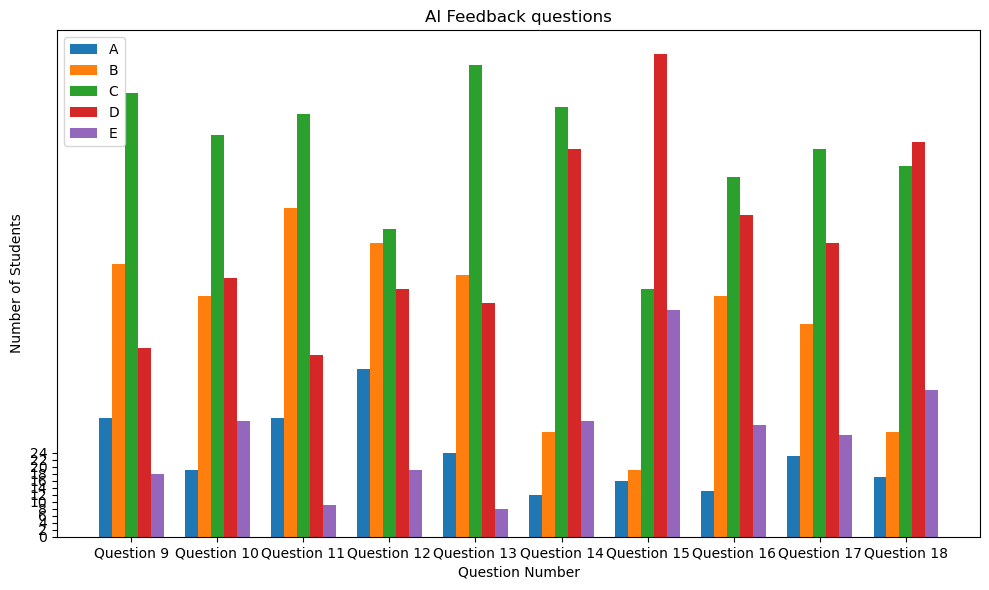

In [63]:
option1_counts = {f'Question {i}': 0 for i in range(1, 19)}
option2_counts = {f'Question {i}': 0 for i in range(1, 19)}
option3_counts = {f'Question {i}': 0 for i in range(1, 19)}
option4_counts = {f'Question {i}': 0 for i in range(1, 19)}
option5_counts = {f'Question {i}': 0 for i in range(1, 19)}

# Count the number of students who chose each option for each question
for actions in remaining_9_to_18.values():
    for question, option in actions:
        if option == 'A':
            option1_counts[question] += 1
        elif option == 'B':
            option2_counts[question] += 1
        elif option == 'C':
            option3_counts[question] += 1
        elif option == 'D':
            option4_counts[question] += 1
        elif option == 'E':
            option5_counts[question] += 1

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
question_numbers = list(range(9, 19))
bar_width = 0.15

option1_counts_values = [option1_counts[f'Question {i}'] for i in question_numbers]
option2_counts_values = [option2_counts[f'Question {i}'] for i in question_numbers]
option3_counts_values = [option3_counts[f'Question {i}'] for i in question_numbers]
option4_counts_values = [option4_counts[f'Question {i}'] for i in question_numbers]
option5_counts_values = [option5_counts[f'Question {i}'] for i in question_numbers]

option1_bars = ax.bar(question_numbers, option1_counts_values, bar_width, label='A')
option2_bars = ax.bar([x + bar_width for x in question_numbers], option2_counts_values, bar_width, label='B')
option3_bars = ax.bar([x + 2 * bar_width for x in question_numbers], option3_counts_values, bar_width, label='C')
option4_bars = ax.bar([x + 3 * bar_width for x in question_numbers], option4_counts_values, bar_width, label='D')
option5_bars = ax.bar([x + 4 * bar_width for x in question_numbers], option5_counts_values, bar_width, label='E')

# Add labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Number of Students')
ax.set_title('AI Feedback questions')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
ax.set_xticks([x + 2 * bar_width for x in question_numbers])
ax.set_xticklabels([f'Question {num}' for num in question_numbers])

# Add legend
ax.legend()

plot_filename = 'questions_9_to_18.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Analysis withing groups

## CRT - T-test

In [64]:
prompted_scores_df = pd.read_csv("prompted_scores.csv")
unprompted_scores_df = pd.read_csv("unprompted_scores.csv")
no_assistance_scores_df = pd.read_csv("no_assistance_scores.csv")

## Analysis - Prompted group

In [65]:
crt_prompted_scores_df = prompted_scores_df[['Roll Number', 'CRT']]
crt_prompted_scores = crt_prompted_scores_df.set_index('Roll Number')['CRT'].to_dict()


In [66]:
# Convert 'CRT' column to numeric
# Now proceed with your original code
prompted_sorted_scores = dict(sorted(crt_prompted_scores.items(), key=lambda item: item[1], reverse=True))
# prompted_average_score = crt_prompted_scores.mean()
# prompted_high_scorers = {k: v for k, v in prompted_sorted_scores.items() if v > prompted_average_score}
# prompted_low_scorers = {k: v for k, v in prompted_sorted_scores.items() if v <= prompted_average_score}


In [67]:
prompt_crt_scorers_feedback = {user: first_4_questions_user_response_data[user] for user in prompted_sorted_scores if user in first_4_questions_user_response_data}

# Initialize counters for the options
prompted_count_crt = {
    'Question 1': {'A': 0, 'B': 0},
    'Question 2': {'A': 0, 'B': 0},
    'Question 3': {'A': 0, 'B': 0},
    'Question 4': {'A': 0, 'B': 0},
}

# Count options for each question among high and low CRT students
for responses in prompt_crt_scorers_feedback.values():
    for question, option in responses.items():
        if question in prompted_count_crt:
            prompted_count_crt[question][option] += 1

# # Calculate the percentages
# total_crt_students = len(prompt_crt_scorers_feedback)
# percentages_high = {
#     question: {option: (count / total_high_crt_students) * 100 for option, count in options.items()}
#         for question, options in prompted_count_crt.items()}

prompted_count_crt

{'Question 1': {'A': 17, 'B': 57},
 'Question 2': {'A': 17, 'B': 57},
 'Question 3': {'A': 40, 'B': 34},
 'Question 4': {'A': 64, 'B': 10}}

## Analysis - Unprompted

In [68]:
crt_unprompted_scores_df = unprompted_scores_df[['Roll Number', 'CRT']]
crt_unprompted_scores = crt_unprompted_scores_df.set_index('Roll Number')['CRT'].to_dict()


In [69]:
unprompted_sorted_scores = dict(sorted(crt_unprompted_scores.items(), key=lambda item: item[1], reverse=True))
# unprompted_average_score = sum(crt_unprompted_scores.values()) / len(unprompted_sorted_scores)
# unprompted_high_scorers = {k: v for k, v in unprompted_sorted_scores.items() if v > unprompted_average_score}
# unprompted_low_scorers = {k: v for k, v in unprompted_sorted_scores.items() if v <= unprompted_average_score}

In [70]:
unprompted_crt_scorers_feedback = {user: first_4_questions_user_response_data[user] for user in unprompted_sorted_scores if user in first_4_questions_user_response_data}

# Initialize counters for the options
unprompted_crt_count = {
    'Question 1': {'A': 0, 'B': 0},
    'Question 2': {'A': 0, 'B': 0},
    'Question 3': {'A': 0, 'B': 0},
    'Question 4': {'A': 0, 'B': 0},
}

# Count options for each question among high and low CRT students
for responses in unprompted_crt_scorers_feedback.values():
    for question, option in responses.items():
        if question in unprompted_crt_count:
            unprompted_crt_count[question][option] += 1

# # Calculate the percentages
# total_high_crt_students = len(unprompted_crt_scorers_feedback)
# percentages_high = {
#     question: {option: (count / total_high_crt_students) * 100 for option, count in options.items()}
#         for question, options in unprompted_question_counters_high.items()}

unprompted_crt_count

{'Question 1': {'A': 23, 'B': 68},
 'Question 2': {'A': 18, 'B': 73},
 'Question 3': {'A': 55, 'B': 36},
 'Question 4': {'A': 81, 'B': 10}}

## Analysis - No Assistance

In [71]:
crt_no_assistance_scores_df = no_assistance_scores_df[['Roll Number', 'CRT']]
crt_no_assistance_scores = crt_no_assistance_scores_df.set_index('Roll Number')['CRT'].to_dict()


In [72]:
no_assistance_sorted_scores = dict(sorted(crt_no_assistance_scores.items(), key=lambda item: item[1], reverse=True))
# no_assistance_average_score = sum(crt_no_assistance_scores.values()) / len(no_assistance_sorted_scores)
# no_assistance_high_scorers = {k: v for k, v in no_assistance_sorted_scores.items() if v > no_assistance_average_score}
# no_assistance_low_scorers = {k: v for k, v in no_assistance_sorted_scores.items() if v <= no_assistance_average_score}

In [73]:
no_assistance_scorers_feedback = {user: first_4_questions_user_response_data[user] for user in no_assistance_sorted_scores if user in first_4_questions_user_response_data}

# Initialize counters for the options
no_assistance_count = {
    'Question 1': {'A': 0, 'B': 0},
    'Question 2': {'A': 0, 'B': 0},
    'Question 3': {'A': 0, 'B': 0},
    'Question 4': {'A': 0, 'B': 0},
}

# Count options for each question among high and low CRT students
for responses in no_assistance_scorers_feedback.values():
    for question, option in responses.items():
        if question in no_assistance_count:
            no_assistance_count[question][option] += 1

# # Calculate the percentages
# total_high_crt_students = len(no_assistance_scorers_feedback)
# percentages_high = {
#     question: {option: (count / total_high_crt_students) * 100 for option, count in options.items()}
        # for question, options in question_counters_high.items()}

no_assistance_count

{'Question 1': {'A': 21, 'B': 69},
 'Question 2': {'A': 21, 'B': 69},
 'Question 3': {'A': 53, 'B': 37},
 'Question 4': {'A': 80, 'B': 10}}

## ANOVA for the feedback responses

In [74]:
import numpy as np
from scipy.stats import f_oneway
# Calculate the proportion of responses choosing option A for each question within each group
def calculate_proportions_A(count_dict):
    proportions = []
    for q in count_dict.values():
        total_responses = q['A'] + q['B']
        proportion_A = q['A'] / total_responses if total_responses != 0 else 0
        proportions.append(proportion_A)
    return proportions

prop_prompted_A = calculate_proportions_A(prompted_count_crt)
prop_unprompted_A = calculate_proportions_A(unprompted_crt_count)
prop_no_assistance_A = calculate_proportions_A(no_assistance_count)

# One-way ANOVA across the groups for the option B for the 4 intertemporal questions
f_val, p_val = f_oneway(prop_prompted_A, prop_unprompted_A, prop_no_assistance_A)
f_val, p_val


(0.005367905166397131, 0.9946496582279982)

In [75]:
from scipy.stats import f_oneway

def calculate_proportions_B(count_dict):
    proportions = []
    for q in count_dict.values():
        total_responses = q['A'] + q['B']
        proportion_B = q['B'] / total_responses if total_responses != 0 else 0
        proportions.append(proportion_B)
    return proportions

prop_prompted = calculate_proportions_B(prompted_count_crt)
prop_unprompted = calculate_proportions_B(unprompted_crt_count)
prop_no_assistance = calculate_proportions_B(no_assistance_count)

# One-way ANOVA across the groups for the option B for the 4 intertemporal questions
f_val, p_val = f_oneway(prop_prompted, prop_unprompted, prop_no_assistance)
f_val, p_val

(0.00536790516639715, 0.9946496582279982)

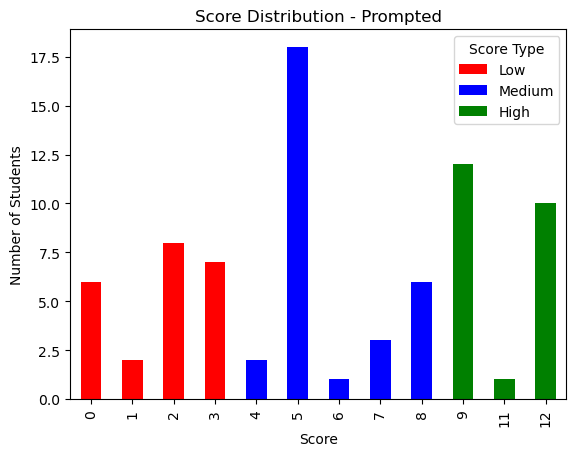

In [76]:
high_score = prompted_scores_df['Score'].quantile(0.75)
low_score = prompted_scores_df['Score'].quantile(0.25)

# Create a new column to differentiate high and low scores
prompted_scores_df['Score Type'] = prompted_scores_df['Score'].apply(lambda x: 'High' if x >= high_score else ('Low' if x <= low_score else 'Medium'))

# Count the number of students per score for high and low
score_counts = prompted_scores_df.groupby(['Score', 'Score Type']).size().unstack(fill_value=0)

# Plotting
score_counts[['Low', 'Medium', 'High']].plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.title('Score Distribution - Prompted')
plt.xlim(right=11.5) 
plt.show()

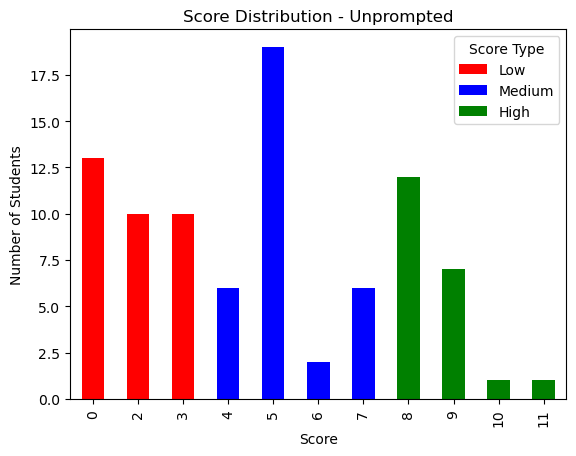

In [77]:
high_score = unprompted_scores_df['Score'].quantile(0.75)
low_score = unprompted_scores_df['Score'].quantile(0.25)

# Create a new column to differentiate high and low scores
unprompted_scores_df['Score Type'] = unprompted_scores_df['Score'].apply(lambda x: 'High' if x >= high_score else ('Low' if x <= low_score else 'Medium'))

# Count the number of students per score for high and low
score_counts = unprompted_scores_df.groupby(['Score', 'Score Type']).size().unstack(fill_value=0)

# Plotting
score_counts[['Low', 'Medium', 'High']].plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.title('Score Distribution - Unprompted')
plt.xlim(right=10.5) 
plt.show()

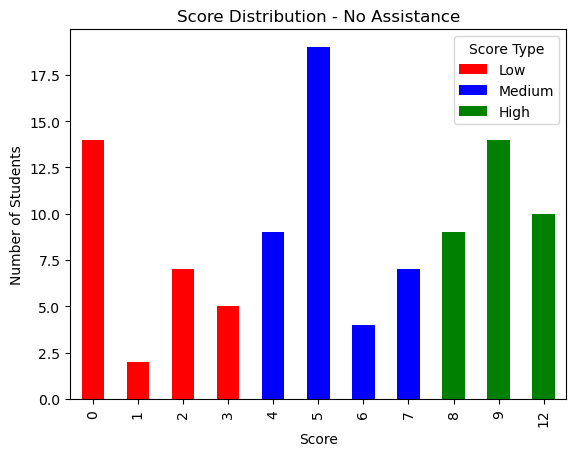

In [78]:
high_score = no_assistance_scores_df['Score'].quantile(0.75)
low_score = no_assistance_scores_df['Score'].quantile(0.25)

# Create a new column to differentiate high and low scores
no_assistance_scores_df['Score Type'] = no_assistance_scores_df['Score'].apply(lambda x: 'High' if x >= high_score else ('Low' if x <= low_score else 'Medium'))

# Count the number of students per score for high and low
score_counts = no_assistance_scores_df.groupby(['Score', 'Score Type']).size().unstack(fill_value=0)

# Plotting
score_counts[['Low', 'Medium', 'High']].plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.title('Score Distribution - No Assistance')
plt.show()

# Time Analysis

## Prompted

In [79]:


# Create a new DataFrame with users as rows and page numbers as columns
prompted_filtered_df['date_diff_seconds'] = prompted_filtered_df['date_diff'].dt.total_seconds()
prompted_new_df = prompted_filtered_df.pivot_table(index='user', columns='page', values='date_diff_seconds', aggfunc='sum', fill_value=0)
prompted_new_df = prompted_new_df.reset_index()

prompted_new_df = prompted_new_df.rename_axis(None, axis=1).rename_axis('user', axis=0)
prompted_new_df.columns.name = None
# calculate overall time and create a new column for the same
prompted_new_df['total_time'] = prompted_new_df.iloc[:, 1:].sum(axis=1)


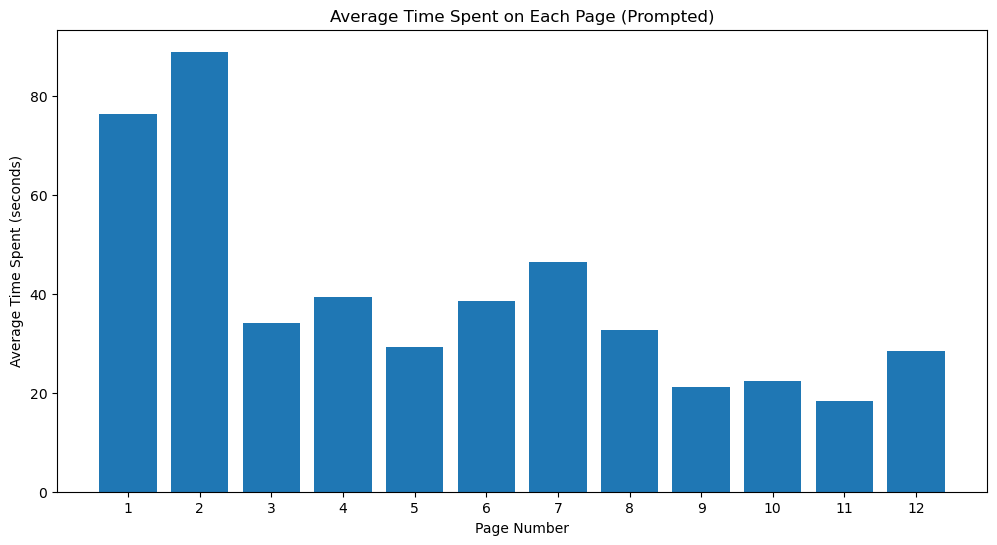

In [80]:
# Get the column names for pages (0-25)
page_columns = [col for col in prompted_new_df.columns[2:] if col != 'total_time']

# Calculating average time spent on each page
avg_times = prompted_new_df[page_columns].mean().reset_index()
avg_times.columns = ['page', 'avg_time']
avg_times = avg_times.set_index('page').to_dict()['avg_time']

# histogram
plt.figure(figsize=(12, 6))
plt.bar(range(len(avg_times)), list(avg_times.values()))
plt.xlabel('Page Number')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Page (Prompted)')
plt.xticks(range(len(avg_times)), list(avg_times.keys()))
plt.show()

## Unprompted

In [81]:
# Create a new DataFrame with users as rows and page numbers as columns
unprompted_filtered_df['date_diff_seconds'] = unprompted_filtered_df['date_diff'].dt.total_seconds()
unprompted_new_df = unprompted_filtered_df.pivot_table(index='user', columns='page', values='date_diff_seconds', aggfunc='sum', fill_value=0)

# Reset the index to have the user column
unprompted_new_df = unprompted_new_df.reset_index()

unprompted_new_df = unprompted_new_df.rename_axis(None, axis=1).rename_axis('user', axis=0)
unprompted_new_df.columns.name = None
# calculate overall time and create a new column for the same
unprompted_new_df['total_time'] = unprompted_new_df.iloc[:, 1:].sum(axis=1)

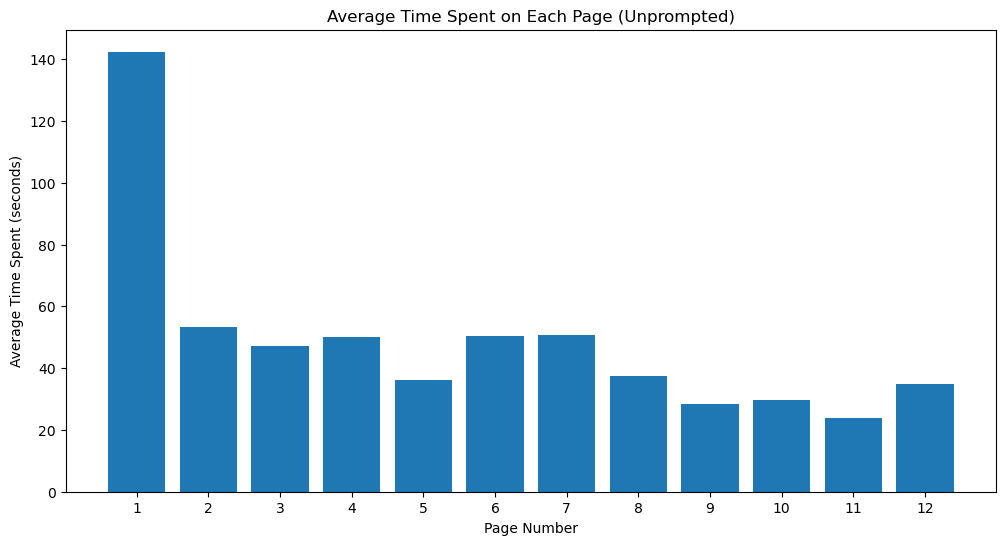

In [82]:
# Get the column names for pages (0-25)
page_columns = [col for col in unprompted_new_df.columns[2:] if col != 'total_time']

# Calculating average time spent on each page
avg_times = unprompted_new_df[page_columns].mean().reset_index()
avg_times.columns = ['page', 'avg_time']
avg_times = avg_times.set_index('page').to_dict()['avg_time']

# histogram
plt.figure(figsize=(12, 6))
plt.bar(range(len(avg_times)), list(avg_times.values()))
plt.xlabel('Page Number')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Page (Unprompted)')
plt.xticks(range(len(avg_times)), list(avg_times.keys()))
plt.show()

## No Assistance

In [83]:
import pandas as pd

# Create a new DataFrame with users as rows and page numbers as columns
no_assistance_filtered_df['date_diff_seconds'] = no_assistance_filtered_df['date_diff'].dt.total_seconds()
no_assistance_new_df = no_assistance_filtered_df.pivot_table(index='user', columns='page', values='date_diff_seconds', aggfunc='sum', fill_value=0)

# Reset the index to have the user column
no_assistance_new_df = no_assistance_new_df.reset_index()

no_assistance_new_df = no_assistance_new_df.rename_axis(None, axis=1).rename_axis('user', axis=0)
no_assistance_new_df.columns.name = None
# calculate overall time and create a new column for the same
no_assistance_new_df['total_time'] = no_assistance_new_df.iloc[:, 1:].sum(axis=1)
no_assistance_new_df

,user,0,1,2,3,4,5,6,7,8,9,10,11,12,200,total_time
user,,,,,,,,,,,,,,,,
0,005,24.360887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,24.360887
1,12220919,0.000000,16.708373,38.414866,32.608870,63.051657,27.925650,44.954872,74.735598,43.466758,21.883143,16.867500,15.166857,69.187382,0.0,464.971526
2,1503043,0.000000,122.974339,36.164886,112.149728,96.778966,17.572445,81.951325,26.232197,51.869885,38.980118,22.876518,15.366975,31.914883,0.0,654.832265
3,174042,0.000000,35.903205,5.656691,3.559912,5.572787,3.009086,3.400244,5.656917,9.817588,3.109948,2.070639,1.940017,1.840130,0.0,81.537164
4,19bac116,0.000000,7.010100,4.926331,5.199962,8.140649,7.941571,3.923241,3.726320,8.593970,3.663086,3.617230,4.798763,4.050943,0.0,65.592166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,kayal,0.000000,11.663546,8.757334,5.538816,2.580392,5.198917,5.525455,1.910620,6.179848,5.270412,6.133490,1.505646,8.855522,0.0,69.119998
96,manojp,0.000000,38.045552,127.095307,81.509202,80.580466,150.854244,91.215728,117.650380,64.104760,35.399961,30.859865,45.049993,39.324811,0.0,901.690269
97,rahul1997,0.000000,64.341541,65.075803,182.988962,48.149949,77.834761,122.249335,144.500118,36.597836,26.974255,14.378970,7.488064,23.471242,0.0,814.050836


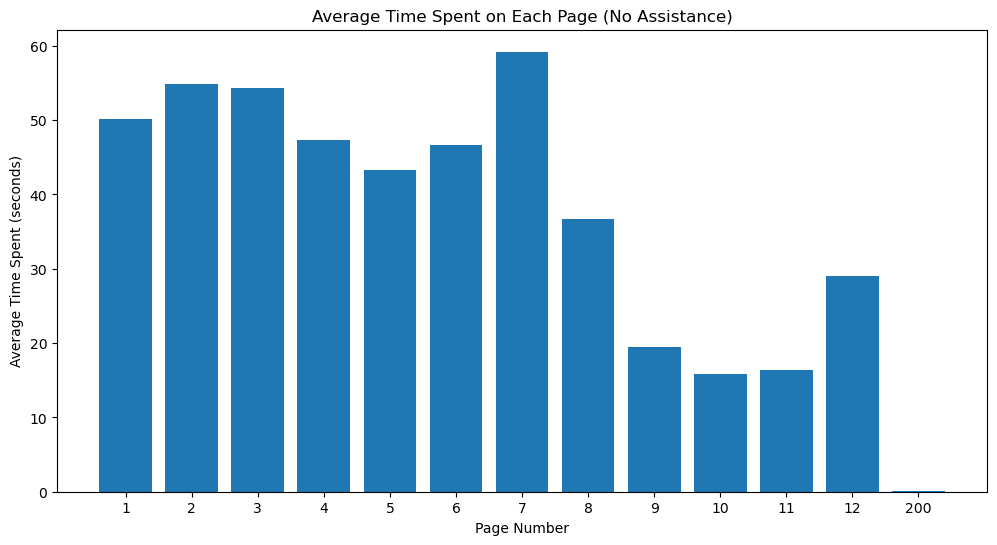

In [84]:
# df = no_assistance_new_df

# Get the column names for pages (0-25)
page_columns = [col for col in no_assistance_new_df.columns[2:] if col != 'total_time']

# Calculating average time spent on each page
avg_times = no_assistance_new_df[page_columns].mean().reset_index()
avg_times.columns = ['page', 'avg_time']
avg_times = avg_times.set_index('page').to_dict()['avg_time']

# histogram
plt.figure(figsize=(12, 6))
plt.bar(range(len(avg_times)), list(avg_times.values()))
plt.xlabel('Page Number')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Page (No Assistance)')
plt.xticks(range(len(avg_times)), list(avg_times.keys()))
plt.show()

# No assistance questions analysis

In [85]:
no_assistance_correct_counts = {i: 0 for i in range(1, 13)}
no_assistance_incorrect_counts = {i: 0 for i in range(1, 13)}

for user, options in no_assistance_options_before_continue.items():
    # Comparing each option with the correct answer list
    for question_number, option in enumerate(options, start=1):
        if question_number <= len(correct_answers_mapped):  # Check if index is within the correct_answers_mapped list
            if option == correct_answers_mapped[question_number - 1]:
                no_assistance_correct_counts[question_number] += 1 # getting the count of correct answer for each questions
            else:
                no_assistance_incorrect_counts[question_number] += 1 # getting the count of incorrect answer for each questions
        else:
            break

no_assistance_top_correct_questions = sorted(no_assistance_correct_counts.items(), key=lambda x: x[1], reverse=True)
no_assistance_top_incorrect_questions = sorted(no_assistance_incorrect_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 5 questions answered correctly most often:")
for question_number, count in no_assistance_top_correct_questions:
    print(f"Question {question_number}: {count} correct answers")

print("\nTop 5 questions answered incorrectly most often:")
for question_number, count in no_assistance_top_incorrect_questions:
    print(f"Question {question_number}: {count} incorrect answers")

Top 5 questions answered correctly most often:
Question 10: 82 correct answers
Question 9: 81 correct answers
Question 8: 80 correct answers
Question 11: 67 correct answers
Question 12: 66 correct answers
Question 4: 65 correct answers
Question 6: 61 correct answers
Question 3: 58 correct answers
Question 5: 55 correct answers
Question 2: 48 correct answers
Question 1: 43 correct answers
Question 7: 28 correct answers

Top 5 questions answered incorrectly most often:
Question 7: 63 incorrect answers
Question 1: 51 incorrect answers
Question 2: 46 incorrect answers
Question 5: 37 incorrect answers
Question 3: 35 incorrect answers
Question 6: 30 incorrect answers
Question 4: 28 incorrect answers
Question 12: 23 incorrect answers
Question 11: 22 incorrect answers
Question 8: 11 incorrect answers
Question 9: 10 incorrect answers
Question 10: 8 incorrect answers


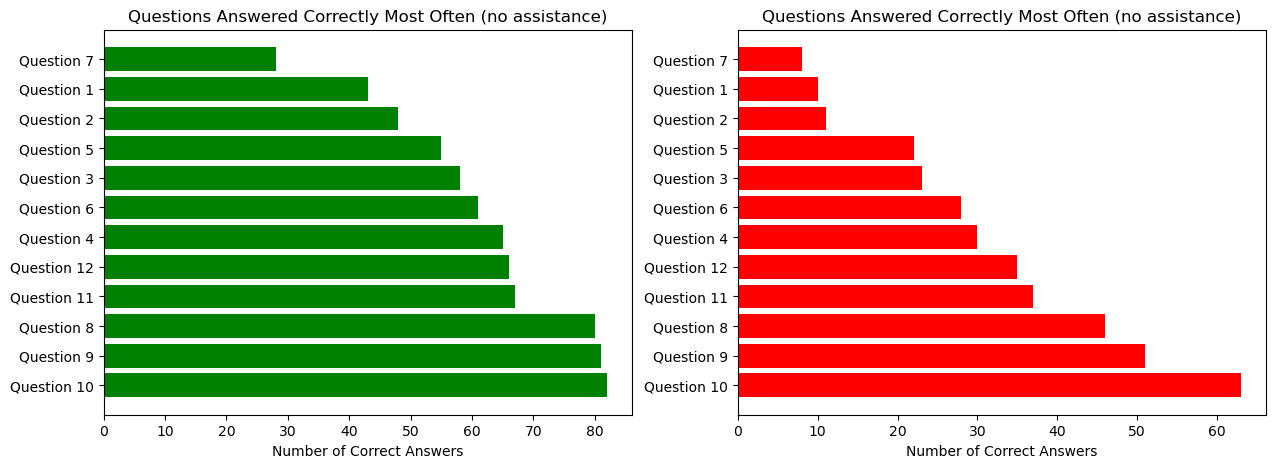

In [86]:
top_correct = sorted(no_assistance_top_correct_questions, key=lambda x: x[1], reverse=True)
top_incorrect = sorted(no_assistance_top_incorrect_questions, key=lambda x: x[1], reverse=True)

# Extracting question numbers and their correct counts
correct_questions = [f'Question {item[0]}' for item in top_correct]
correct_counts = [item[1] for item in top_correct]

incorrect_questions = [f'Question {item[0]}' for item in top_incorrect]
incorrect_counts = [item[1] for item in top_incorrect]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Creating the bar plot for the top 5 questions answered correctly
ax1.barh(correct_questions, correct_counts, color='green')
ax1.set_title('Questions Answered Correctly Most Often (no assistance)')
ax1.set_xlabel('Number of Correct Answers')
ax1.set_yticks(range(len(correct_questions)))
ax1.set_yticklabels(correct_questions)

ax2.barh(incorrect_questions, incorrect_counts, color='red')
ax2.set_title('Questions Answered Correctly Most Often (no assistance)')
ax2.set_xlabel('Number of Correct Answers')
ax2.set_yticks(range(len(correct_questions)))
ax2.set_yticklabels(correct_questions)

plt.show()



## Unprompted questions analysis

In [87]:
unprompted_correct_counts = {i: 0 for i in range(1, 13)}
unprompted_incorrect_counts = {i: 0 for i in range(1, 13)}

for user, options in unprompted_options_before_continue.items():
    # Comparing each option with the correct answer list
    for question_number, option in enumerate(options, start=1):
        if question_number <= len(correct_answers_mapped):  # Check if index is within the correct_answers_mapped list
            if option == correct_answers_mapped[question_number - 1]:
                unprompted_correct_counts[question_number] += 1 # getting the count of correct answer for each questions
            else:
                unprompted_incorrect_counts[question_number] += 1 # getting the count of incorrect answer for each questions
        else:
            break

unprompted_top_correct_questions = sorted(unprompted_correct_counts.items(), key=lambda x: x[1], reverse=True)
unprompted_top_incorrect_questions = sorted(unprompted_incorrect_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 5 questions answered correctly most often:")
for question_number, count in unprompted_top_correct_questions:
    print(f"Question {question_number}: {count} correct answers")

print("\nTop 5 questions answered incorrectly most often:")
for question_number, count in unprompted_top_incorrect_questions:
    print(f"Question {question_number}: {count} incorrect answers")

Top 5 questions answered correctly most often:
Question 10: 77 correct answers
Question 11: 69 correct answers
Question 9: 67 correct answers
Question 8: 64 correct answers
Question 3: 59 correct answers
Question 12: 56 correct answers
Question 4: 55 correct answers
Question 5: 51 correct answers
Question 1: 48 correct answers
Question 6: 44 correct answers
Question 2: 38 correct answers
Question 7: 29 correct answers

Top 5 questions answered incorrectly most often:
Question 7: 67 incorrect answers
Question 2: 60 incorrect answers
Question 6: 52 incorrect answers
Question 1: 51 incorrect answers
Question 5: 46 incorrect answers
Question 4: 42 incorrect answers
Question 3: 38 incorrect answers
Question 12: 34 incorrect answers
Question 8: 32 incorrect answers
Question 9: 28 incorrect answers
Question 11: 26 incorrect answers
Question 10: 18 incorrect answers


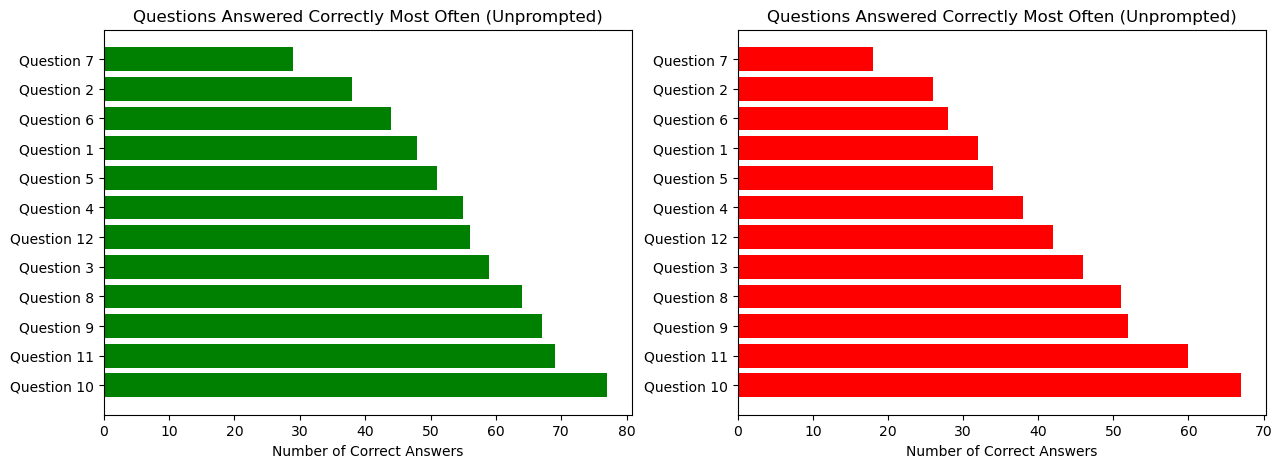

In [88]:
top_correct = sorted(unprompted_top_correct_questions, key=lambda x: x[1], reverse=True)
top_incorrect = sorted(unprompted_top_incorrect_questions, key=lambda x: x[1], reverse=True)

# Extracting question numbers and their correct counts
correct_questions = [f'Question {item[0]}' for item in top_correct]
correct_counts = [item[1] for item in top_correct]

incorrect_questions = [f'Question {item[0]}' for item in top_incorrect]
incorrect_counts = [item[1] for item in top_incorrect]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Creating the bar plot for the top 5 questions answered correctly
ax1.barh(correct_questions, correct_counts, color='green')
ax1.set_title('Questions Answered Correctly Most Often (Unprompted)')
ax1.set_xlabel('Number of Correct Answers')
ax1.set_yticks(range(len(correct_questions)))
ax1.set_yticklabels(correct_questions)

ax2.barh(incorrect_questions, incorrect_counts, color='red')
ax2.set_title('Questions Answered Correctly Most Often (Unprompted)')
ax2.set_xlabel('Number of Correct Answers')
ax2.set_yticks(range(len(correct_questions)))
ax2.set_yticklabels(correct_questions)

plt.show()


# Prompted Questions analysis

In [89]:
prompted_correct_counts = {i: 0 for i in range(1, 13)}
prompted_incorrect_counts = {i: 0 for i in range(1, 13)}

for user, options in prompted_options_before_continue.items():
    # Comparing each option with the correct answer list
    for question_number, option in enumerate(options, start=1):
        if question_number <= len(correct_answers_mapped):  # Check if index is within the correct_answers_mapped list
            if option == correct_answers_mapped[question_number - 1]:
                prompted_correct_counts[question_number] += 1 # getting the count of correct answer for each questions
            else:
                prompted_incorrect_counts[question_number] += 1 # getting the count of incorrect answer for each questions
        else:
            break

prompted_top_correct_questions = sorted(prompted_correct_counts.items(), key=lambda x: x[1], reverse=True)
prompted_top_incorrect_questions = sorted(prompted_incorrect_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 5 questions answered correctly most often:")
for question_number, count in prompted_top_correct_questions:
    print(f"Question {question_number}: {count} correct answers")

print("\nTop 5 questions answered incorrectly most often:")
for question_number, count in prompted_top_incorrect_questions:
    print(f"Question {question_number}: {count} incorrect answers")

Top 5 questions answered correctly most often:
Question 10: 67 correct answers
Question 9: 66 correct answers
Question 11: 56 correct answers
Question 8: 54 correct answers
Question 4: 50 correct answers
Question 3: 46 correct answers
Question 12: 45 correct answers
Question 5: 40 correct answers
Question 1: 37 correct answers
Question 6: 36 correct answers
Question 2: 31 correct answers
Question 7: 28 correct answers

Top 5 questions answered incorrectly most often:
Question 7: 48 incorrect answers
Question 2: 45 incorrect answers
Question 6: 40 incorrect answers
Question 1: 39 incorrect answers
Question 5: 36 incorrect answers
Question 3: 30 incorrect answers
Question 12: 29 incorrect answers
Question 4: 26 incorrect answers
Question 8: 22 incorrect answers
Question 11: 19 incorrect answers
Question 9: 10 incorrect answers
Question 10: 9 incorrect answers


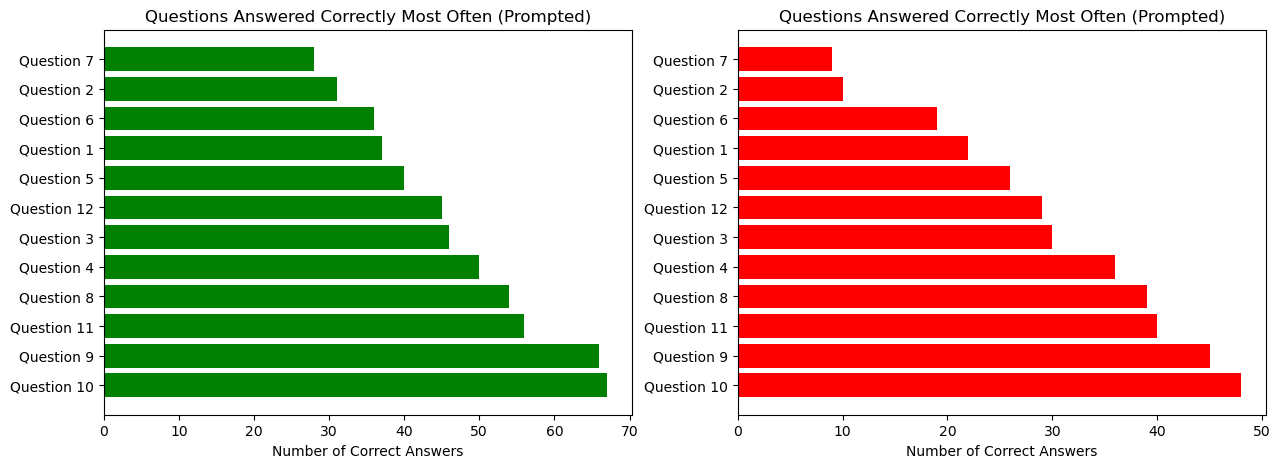

In [90]:
top_correct = sorted(prompted_top_correct_questions, key=lambda x: x[1], reverse=True)
top_incorrect = sorted(prompted_top_incorrect_questions, key=lambda x: x[1], reverse=True)

# Extracting question numbers and their correct counts
correct_questions = [f'Question {item[0]}' for item in top_correct]
correct_counts = [item[1] for item in top_correct]

incorrect_questions = [f'Question {item[0]}' for item in top_incorrect]
incorrect_counts = [item[1] for item in top_incorrect]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Creating the bar plot for the top 5 questions answered correctly
ax1.barh(correct_questions, correct_counts, color='green')
ax1.set_title('Questions Answered Correctly Most Often (Prompted)')
ax1.set_xlabel('Number of Correct Answers')
ax1.set_yticks(range(len(correct_questions)))
ax1.set_yticklabels(correct_questions)

ax2.barh(incorrect_questions, incorrect_counts, color='red')
ax2.set_title('Questions Answered Correctly Most Often (Prompted)')
ax2.set_xlabel('Number of Correct Answers')
ax2.set_yticks(range(len(correct_questions)))
ax2.set_yticklabels(correct_questions)

plt.show()


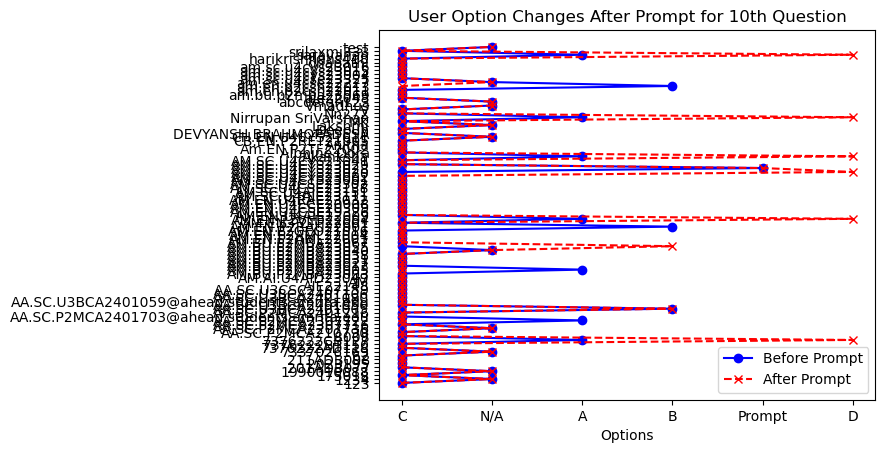

In [91]:
import matplotlib.pyplot as plt

# User action mapping provided
# prompted_action_user_mapping = {
#     '175018': ['Start', 'A', 'Continue', 'D', 'Continue', 'D', 'Continue', 'D', 'Continue', 'D', 'Continue', 'D', 'Continue', 'B', 'Continue', 'B', 'Continue', 'C', 'Continue', 'C', 'Continue', 'C', 'Continue', 'A', 'End'],
#     '2023195': ['Start', 'B', 'Continue', 'B', 'Continue', 'B', 'Continue', 'B', 'Continue', 'B', 'Continue', 'C', 'Continue', 'B', 'Continue', 'B', 'Continue', 'C', 'Continue', 'C', 'Continue', 'C', 'Continue', 'B', 'End'],
#     '7376222AD118': ['Start', 'A', 'Continue', 'D', 'Continue', 'D', 'Continue', 'D', 'Continue', 'D', 'Continue', 'D', 'Continue', 'B', 'Continue', 'B', 'Continue', 'C', 'Continue', 'C', 'Continue', 'C', 'Continue', 'A', 'End'],
#     '7376222BT150': ['Start', 'A', 'Continue', 'D', 'Continue', 'D', 'Continue', 'D', 'Continue', 'D', 'Continue', 'D', 'Continue', 'B', 'Continue', 'B', 'Continue', 'C', 'Continue', 'C', 'Continue', 'C', 'Continue', 'A', 'End'],
#     '7376222CB127': ['Start', 'Prompt', 'D', 'Continue', 'Prompt', 'B', 'Continue', 'Prompt', 'B', 'Continue', 'Prompt', 'B', 'Continue', 'Prompt', 'B', 'Continue', 'Prompt', 'B', 'Continue', 'Prompt', 'C', 'Continue', 'Prompt', 'A', 'Continue', 'Prompt', 'A', 'Continue', 'Prompt', 'D', 'Continue', 'Prompt', 'D', 'Continue', 'Prompt', 'C', 'End']
# }

# Dictionary to store results
user_changes = {}

# Find the 10th question options for each user
for user, actions in prompted_action_user_mapping.items():
    try:
        # Get index of the 9th and 10th 'Continue'
        ninth_continue_index = [i for i, x in enumerate(actions) if x == 'Continue'][8]
        tenth_continue_index = [i for i, x in enumerate(actions) if x == 'Continue'][9]

        # Get the action before and after the 9th 'Continue'
        before_prompt = actions[ninth_continue_index - 1]
        after_prompt = actions[tenth_continue_index - 1]
        
        # Store if there was a change
        user_changes[user] = (before_prompt, after_prompt)
    except IndexError:
        # Handle cases where there aren't enough 'Continue' actions
        user_changes[user] = ('N/A', 'N/A')

# Plotting
fig, ax = plt.subplots()
y = list(range(len(user_changes)))
labels = list(user_changes.keys())
before = [change[0] for change in user_changes.values()]
after = [change[1] for change in user_changes.values()]

ax.plot(before, y, label='Before Prompt', marker='o', linestyle='-', color='blue')
ax.plot(after, y, label='After Prompt', marker='x', linestyle='--', color='red')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.set_xlabel('Options')
ax.set_title('User Option Changes After Prompt for 10th Question')
ax.legend()

plt.show()


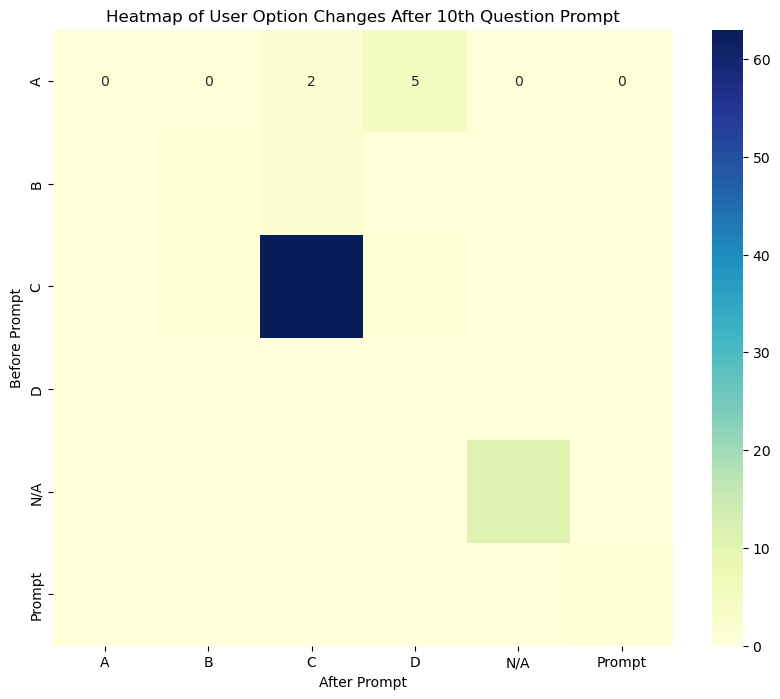

In [92]:
import numpy as np
import seaborn as sns

# Options that could be chosen by the users
options = sorted(set(before + after))

# Create a matrix to count transitions
transition_matrix = np.zeros((len(options), len(options)), dtype=int)
option_index = {option: idx for idx, option in enumerate(options)}

# Fill the transition matrix with counts
for before_option, after_option in zip(before, after):
    if before_option in options and after_option in options:
        before_idx = option_index[before_option]
        after_idx = option_index[after_option]
        transition_matrix[before_idx, after_idx] += 1

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=options, yticklabels=options, ax=ax)
ax.set_xlabel('After Prompt')
ax.set_ylabel('Before Prompt')
ax.set_title('Heatmap of User Option Changes After 10th Question Prompt')
plt.show()
